# Alcohol Romantics - sprawozdanie
### Autorzy: Hanna Zdulska, Jakub Wiśniewski

# Zbiór

## Opis
Context:   
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Content:   
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:   

**school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)   
**sex** - student's sex (binary: 'F' - female or 'M' - male)   
**age** - student's age (numeric: from 15 to 22)   
**address** - student's home address type (binary: 'U' - urban or 'R' - rural)     
**famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)     
**Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)     
**Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)     
**Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)     
**Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')     
**Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')     
**reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')     
**guardian** - student's guardian (nominal: 'mother', 'father' or 'other')     
**traveltime** - home to school travel time (numeric: 1 - 1 hour)     
**studytime** - weekly study time (numeric: 1 - 10 hours)     
**failures** - number of past class failures (numeric: n if 1<=n<3, else 4)     
**schoolsup** - extra educational support (binary: yes or no)     
**famsup** - family educational support (binary: yes or no)     
**paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)     
**activities** - extra-curricular activities (binary: yes or no)     
**nursery** - attended nursery school (binary: yes or no)     
**higher** - wants to take higher education (binary: yes or no)     
**internet** - Internet access at home (binary: yes or no)     
**romantic** - with a romantic relationship (binary: yes or no)     
**famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)     
**freetime** - free time after school (numeric: from 1 - very low to 5 - very high)     
**goout** - going out with friends (numeric: from 1 - very low to 5 - very high)     
**Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)     
**Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)     
**health** - current health status (numeric: from 1 - very bad to 5 - very good)     
**absences** - number of school absences (numeric: from 0 to 93)     

These grades are related with the course subject, Math or Portuguese:     
     
**G1** - first period grade (numeric: from 0 to 20)     
**G2** - second period grade (numeric: from 0 to 20)
**G3** - final grade (numeric: from 0 to 20, output target)     

Source Information     
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.     

Fabio Pagnotta, Hossain Mohammad Amran.     
Email:fabio.pagnotta\@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it     
University Of Camerino     


### Cel
Postanowiliśmy wziąć zbiór danych, który jest najczęściej używany do przewidywania uzależniania studentów od alkoholu. Jednakże chcieliśmy przewidzieć inną rzecz- czy dana osoba jest w związku. Stąd wzięła się nazwa naszego zespołu - Alcohol Romantics. Zadanie nie jest łatwe, dane są z rzeczywistego źródła i nieprzystosowane do naszego zadania.

In [2]:
options(stringsAsFactors = F)
library(DataExplorer)
library(ggplot2)
library(patchwork)
library(dplyr)
df <- read.csv("./students-all.csv")
df <- df %>% select(-X)

# to make procentowa tabelka
ptable <- function(s1, s2){
  tab <- table(df[,c(s1,s2)])
  as.data.frame(prop.table(tab, 1)*100)
}

## EDA 

In [3]:
slices <- which(colnames(df)  %in% c("age", "failures", "absences", "G1", "G2", "G3"))
df[, -slices] <- lapply(df[, -slices], as.factor)
head(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,major
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,3,4,1,1,3,6,5,6,6,mat
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,3,3,1,1,3,4,5,5,6,mat
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,3,2,2,3,3,10,7,8,10,mat
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,2,2,1,1,5,2,15,14,15,mat
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,3,2,1,2,5,4,6,10,10,mat
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,4,2,1,2,5,10,15,15,15,mat


Większość kolumn jest w postaci zmiennych o rozkładzie dyskretnym. Jest tak dlatego, że dane zostały zebrane w postaci ankiet, na których studenci mieli kilka opcji do wyboru.


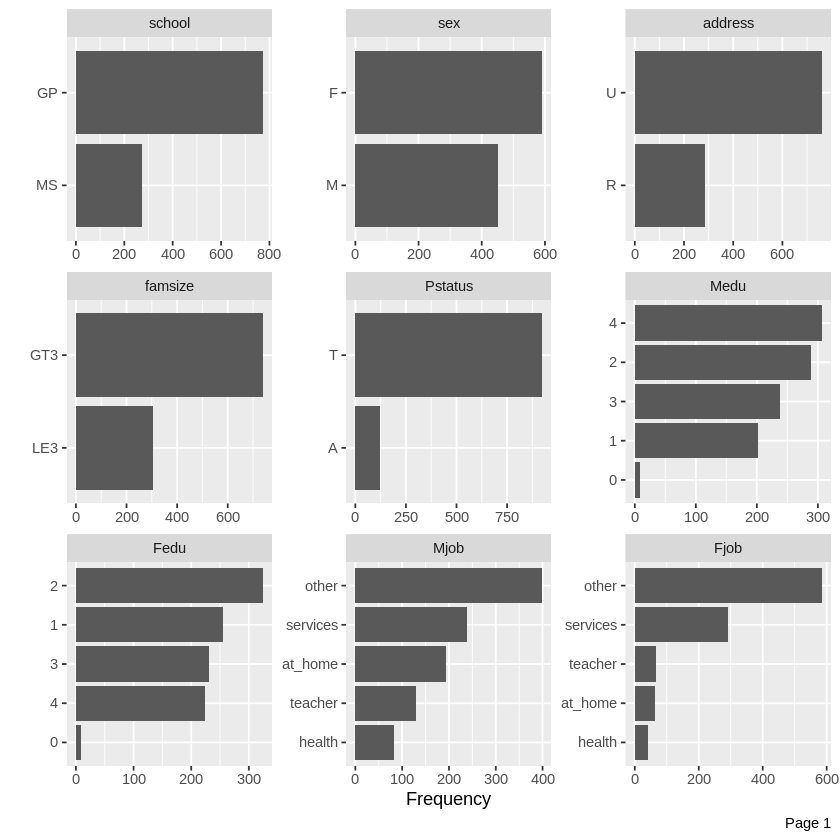

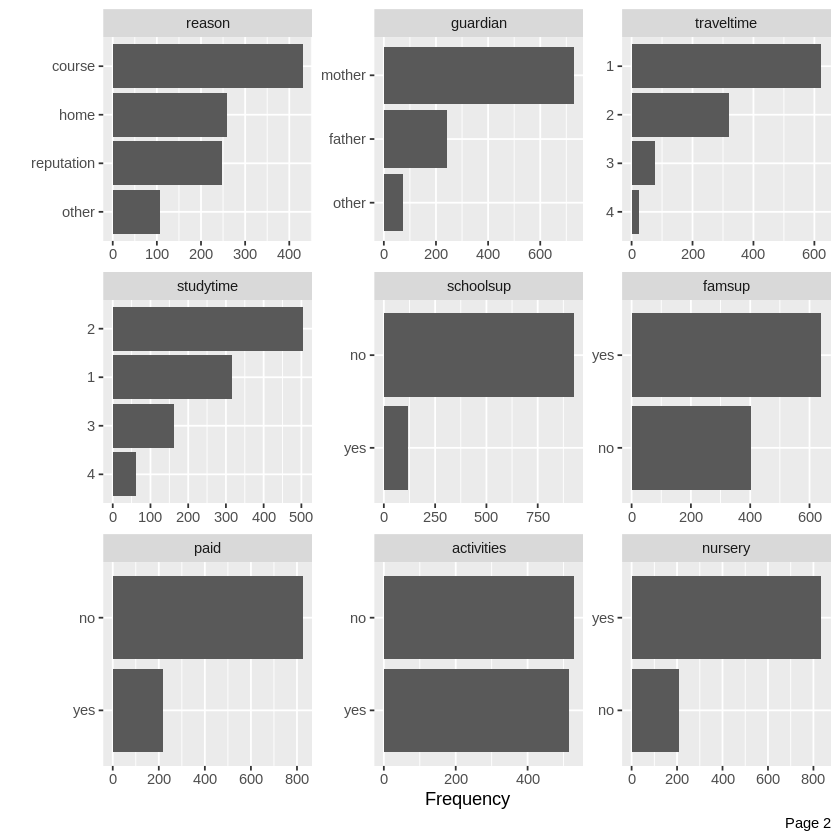

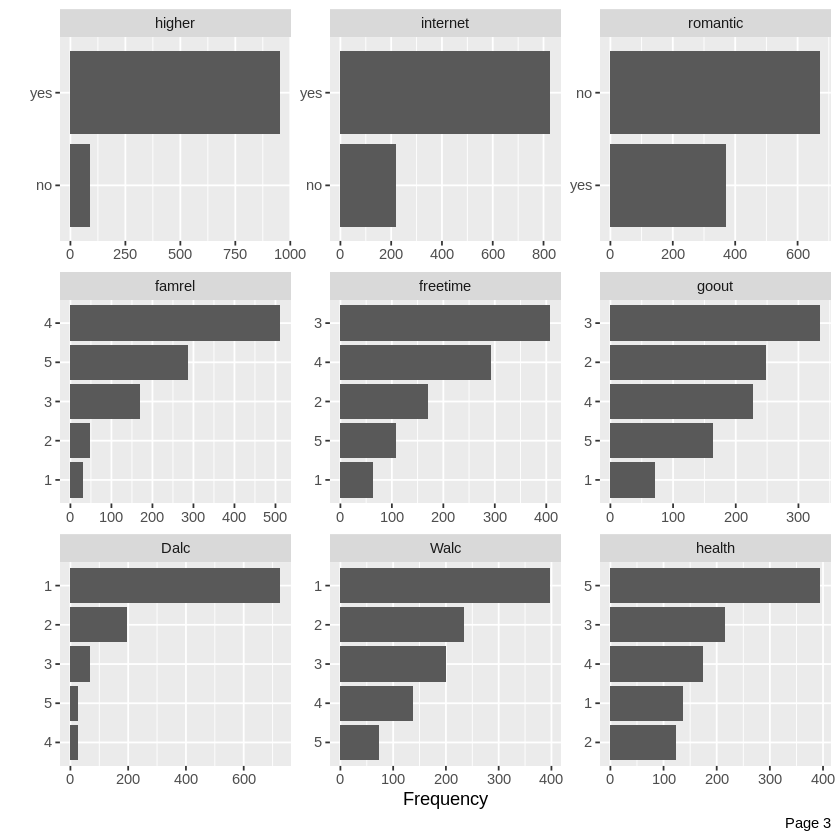

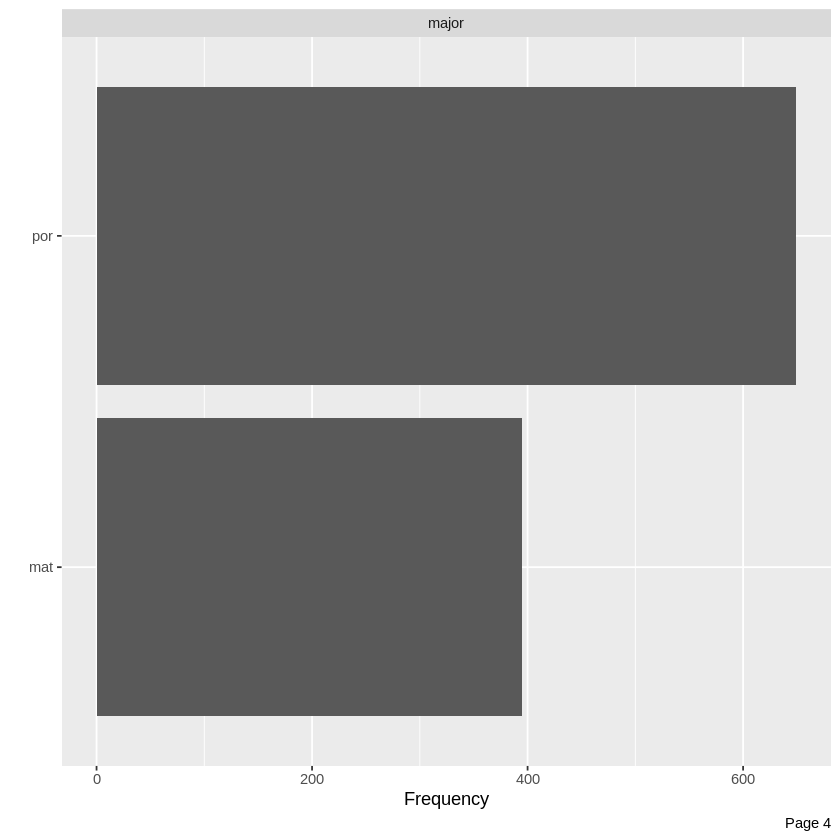

In [4]:
DataExplorer::plot_bar(df) 


Ze zmiennymi ciągłymi jest nieco inaczej. Dla każdej zmiennej możemy wyróżnić kilka-kilkanaście unikatowych wartości. 


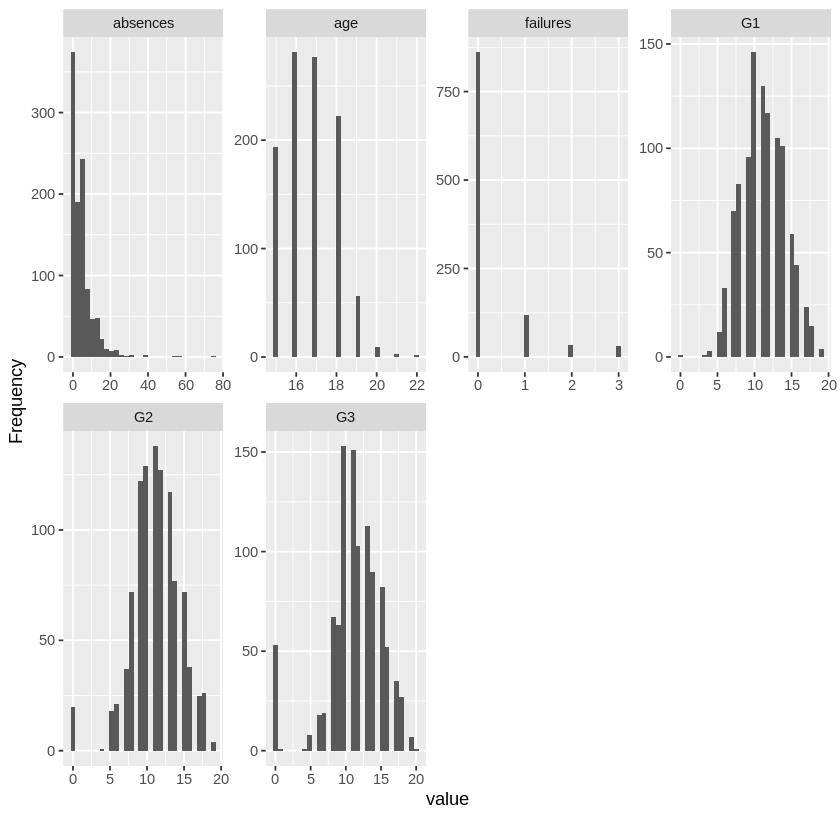

In [5]:
DataExplorer::plot_histogram(df)


Tak prezentują się zaś gęstości zmiennych ciągłych. Najbardziej podobne do rozkładu normalnego są G1, G2 i G3.


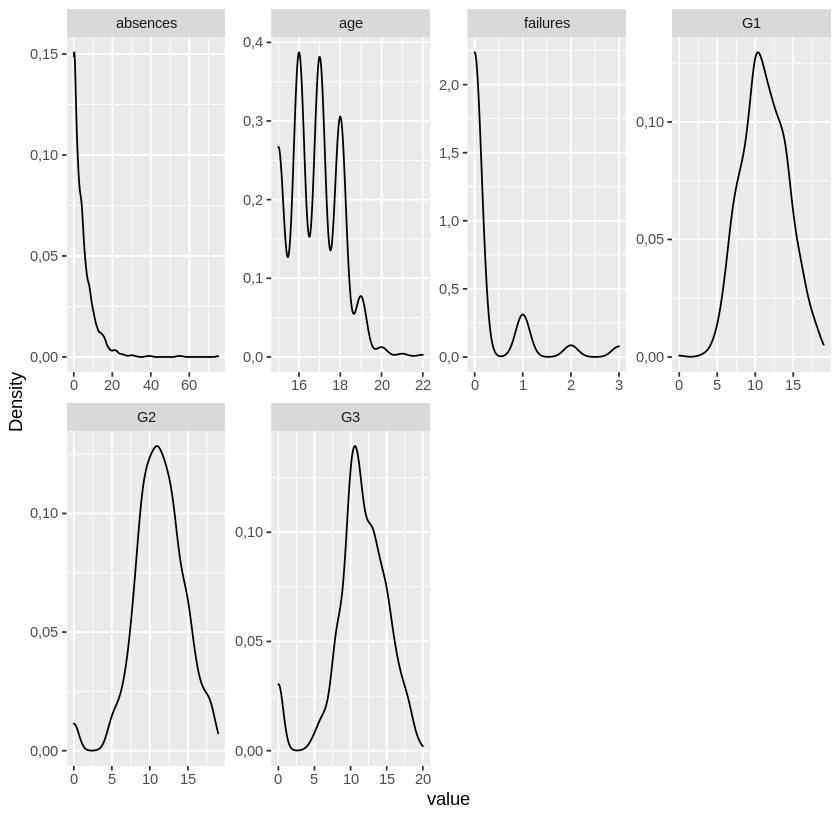

In [6]:
DataExplorer::plot_density(df)

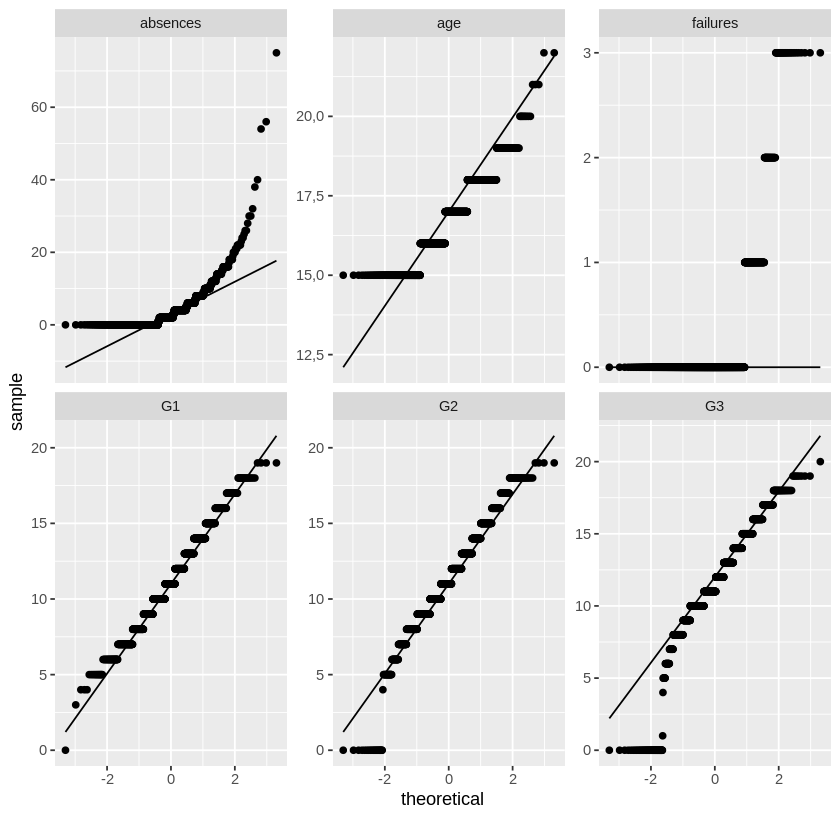

In [7]:
DataExplorer::plot_qq(df)


Popatrzmy teraz przez pryzmat zmiennej `romantic` oznaczającej czy osoba jest w związku. Zwróćmy uwagę na wykres w stosunku do wieku. Mediana wieku osób będących w związku przewyższa o około rok medianę wieku osób niebędących w związku. Możemy dopatrzeć się również delikatnie lepszych wyników końcowych (G3) osób niebędących w związku.

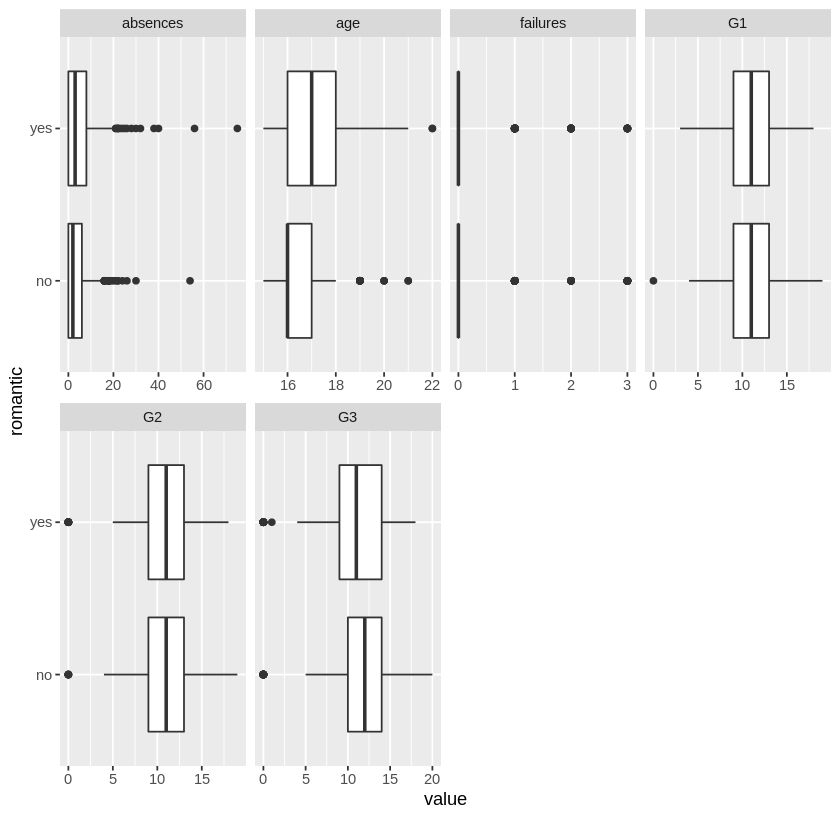

In [8]:
DataExplorer::plot_boxplot(df, by = "romantic")

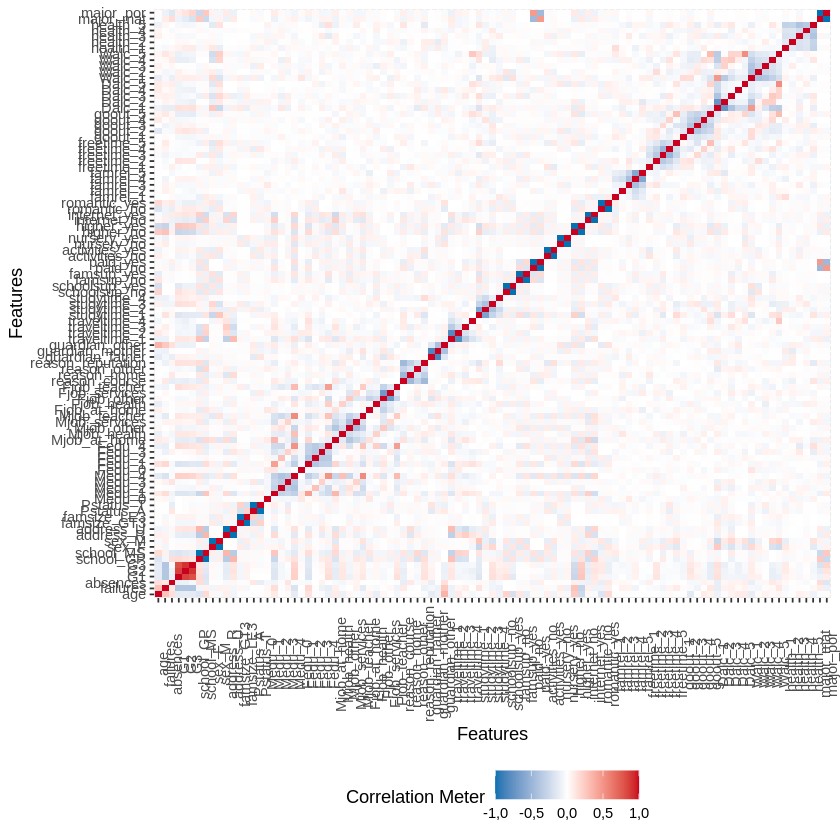

In [9]:
DataExplorer::plot_correlation(df)

Kto mało pije w weekendy ten w tygodniu też mało pije. Czy wszyscy? Wśród osób które piją więcej w tygodniu, a mniej na weekendzie są prawie wyłącznie osoby w związku! Poza tym widzimy, że studenci wolą konsumować alkohol podczas weekendu.

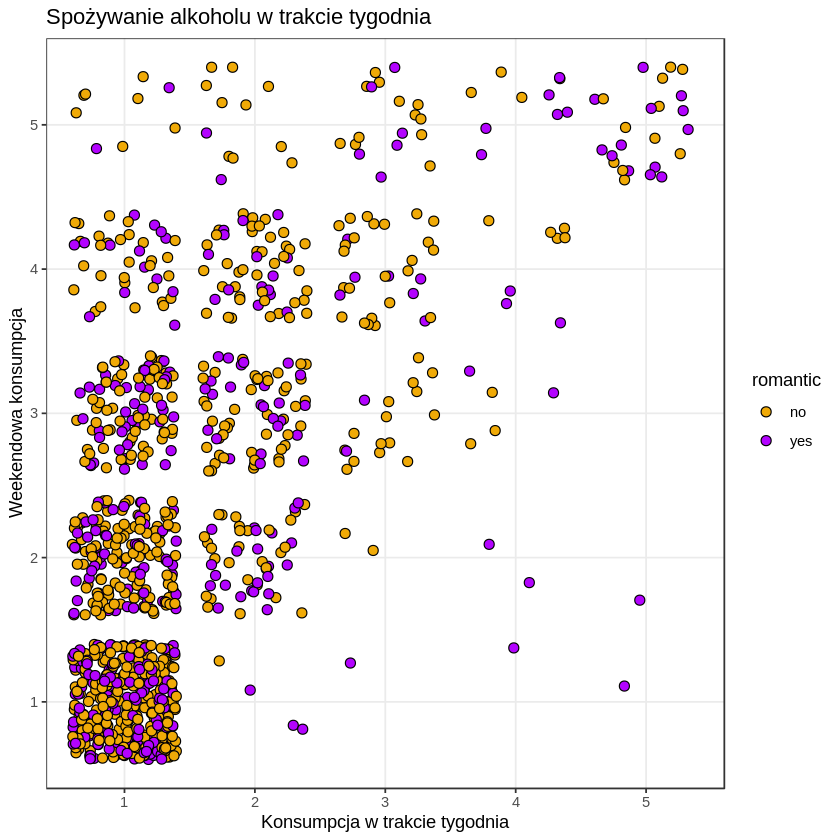

In [10]:
# tendencja do picia w weekendy, ale wytrywali romantycy w [4,5] Dalc
ggplot(df, aes(x = Dalc, y=Walc, fill = romantic)) + geom_jitter(shape =21, size = 2.5) +
  scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) + theme_bw() + ylab("Weekendowa konsumpcja") + xlab("Konsumpcja w trakcie tygodnia") + ggtitle("Spożywanie alkoholu w trakcie tygodnia")

Zwróćmy uwagę na ogony rozkładów. Osoby w związku częśniej dostają skrajnie złe wyniki i żadziej skrajnie dobre. Czy miłość jest barierą do dobrych wyników w nauce?    

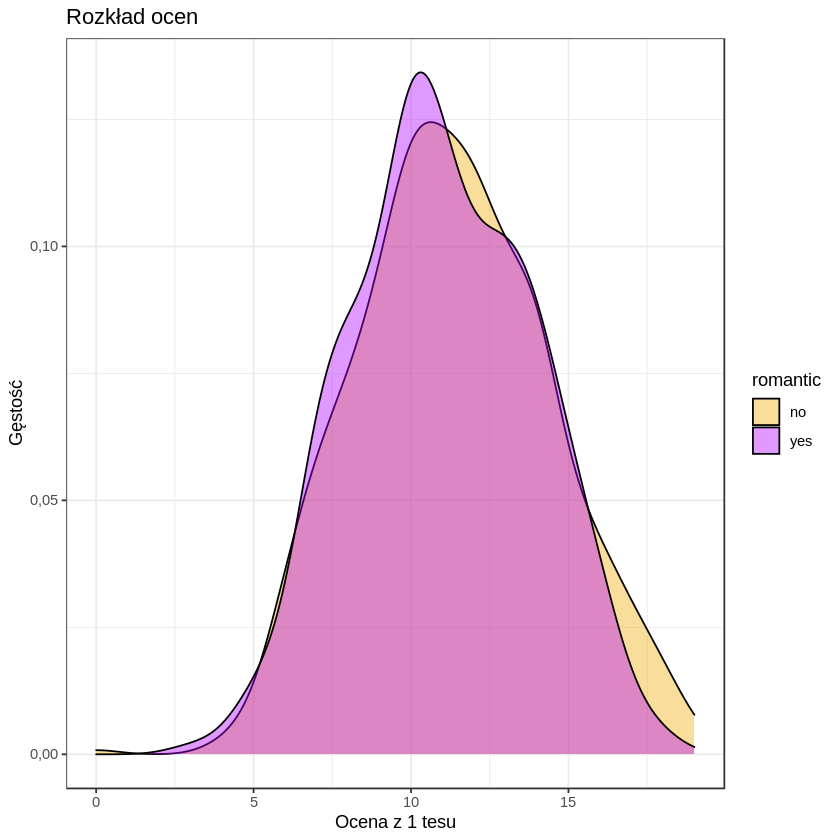

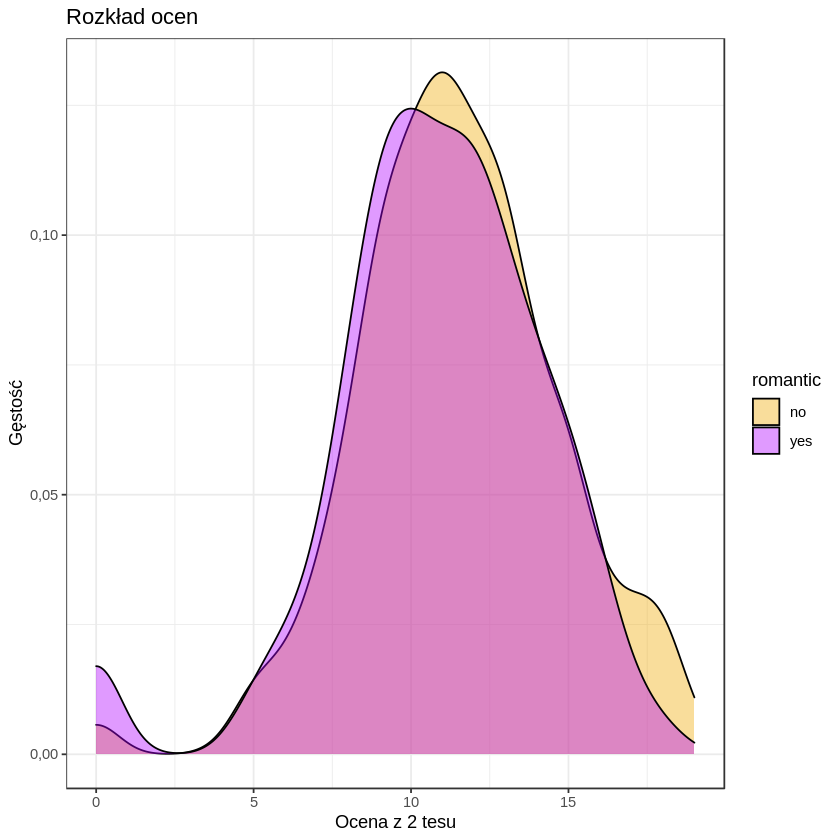

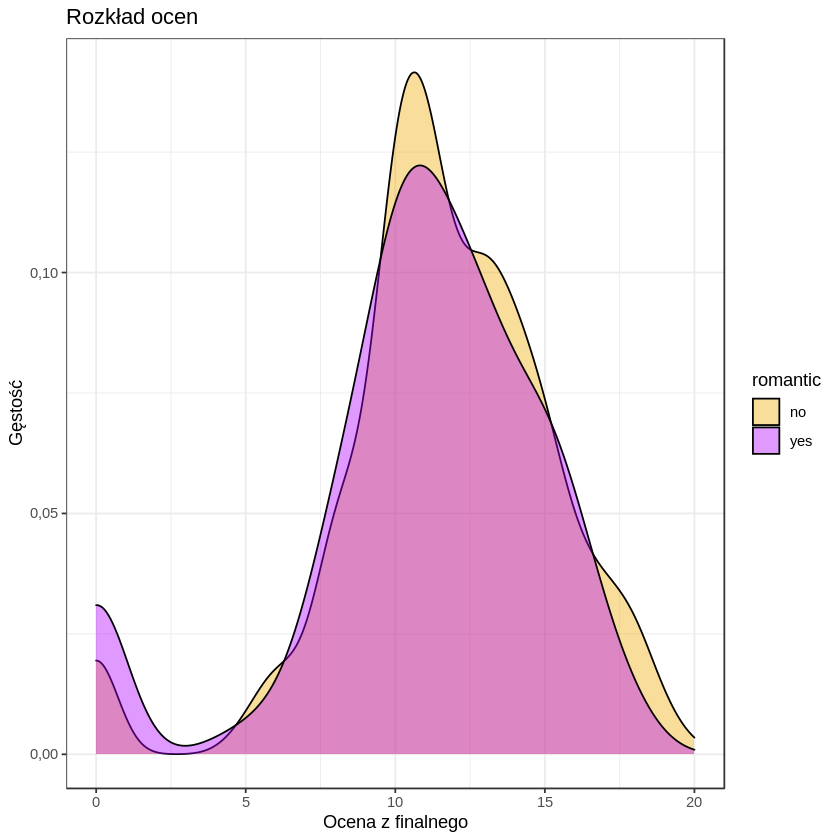

In [11]:
# rozkład wyników w zależności od związku
ggplot(df, aes(x = G1, fill = romantic)) + geom_density(alpha = 0.4) + scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
  theme_bw() + xlab("Ocena z 1 tesu") + ylab("Gęstość") + ggtitle("Rozkład ocen")
ggplot(df, aes(x = G2, fill = romantic)) + geom_density(alpha = 0.4) + scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
  theme_bw() + xlab("Ocena z 2 tesu") + ylab("Gęstość") + ggtitle("Rozkład ocen")
ggplot(df, aes(x = G3, fill = romantic)) + geom_density(alpha = 0.4) + scale_fill_manual(values = c("#f0aa07", "#b303ff"  ))+ 
  theme_bw() + xlab("Ocena z finalnego") + ylab("Gęstość") + ggtitle("Rozkład ocen")



Kto pije więcej? Tutaj nie ma zwyzięzcy, chociaż wśród osób pijących w weekendy najwięcej jest większy odsetek osób w związku.   


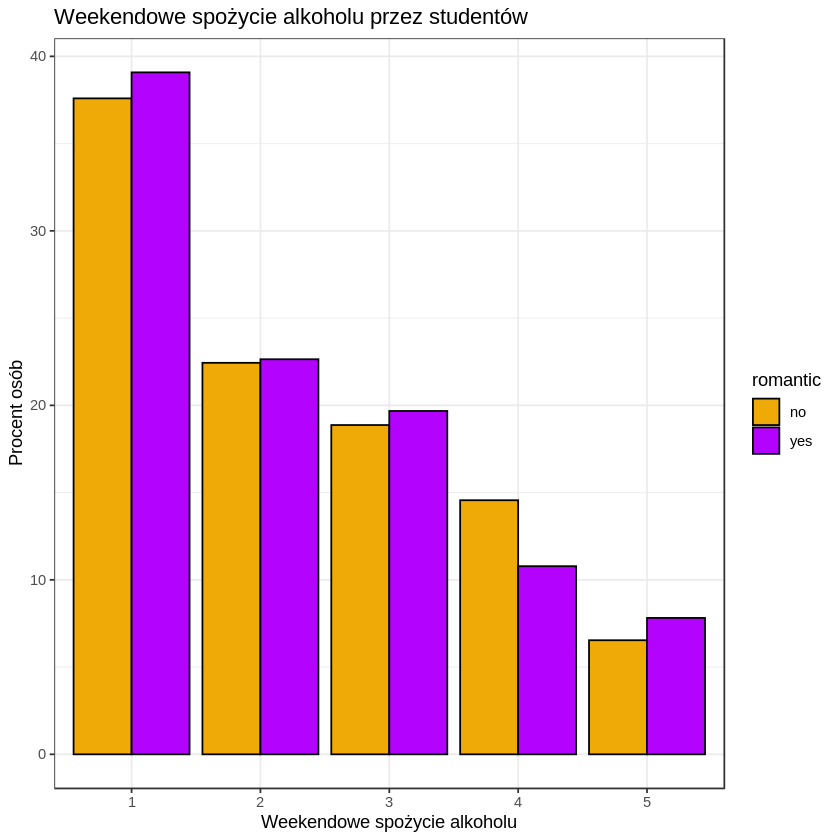

In [13]:
tab <- table(df[,c("romantic", "Walc")])
x <- as.data.frame(prop.table(tab, 1)*100)
ggplot(x, aes(x = Walc, y = Freq, fill = romantic)) + geom_bar(position = "dodge", stat = "identity", color = "black") + ylab("Procent osób") + theme_bw() + xlab("Weekendowe spożycie alkoholu") +
  ggtitle("Weekendowe spożycie alkoholu przez studentów") + 
  scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) 

Osoby w ziązku dużo częściej sięgają po alkohol w trakcie tygodnia. Czyżby wyczekiwali weekendów w których spotykają swoją sympatię?   


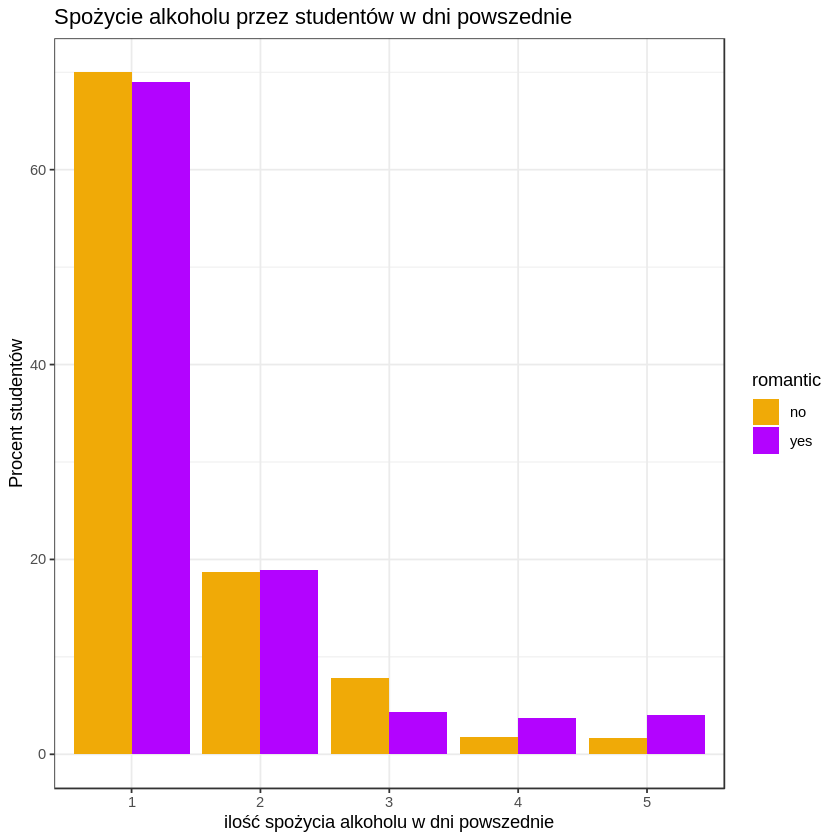

In [15]:
tab <- table(df[,c("romantic", "Dalc")])
x <- as.data.frame(prop.table(tab, 1)*100)
ggplot(x, aes(x = Dalc, y = Freq, fill = romantic)) + 
geom_bar(position = "dodge", stat = "identity") +
scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) + 
theme_bw() + xlab("ilość spożycia alkoholu w dni powszednie") +
ylab("Procent studentów") +
ggtitle("Spożycie alkoholu przez studentów w dni powszednie")

Dodajmy teraz weekendową konsumpcję do tej tygodniowej. Na tym wykresie widzimy liczbę osób, nie odsetek.

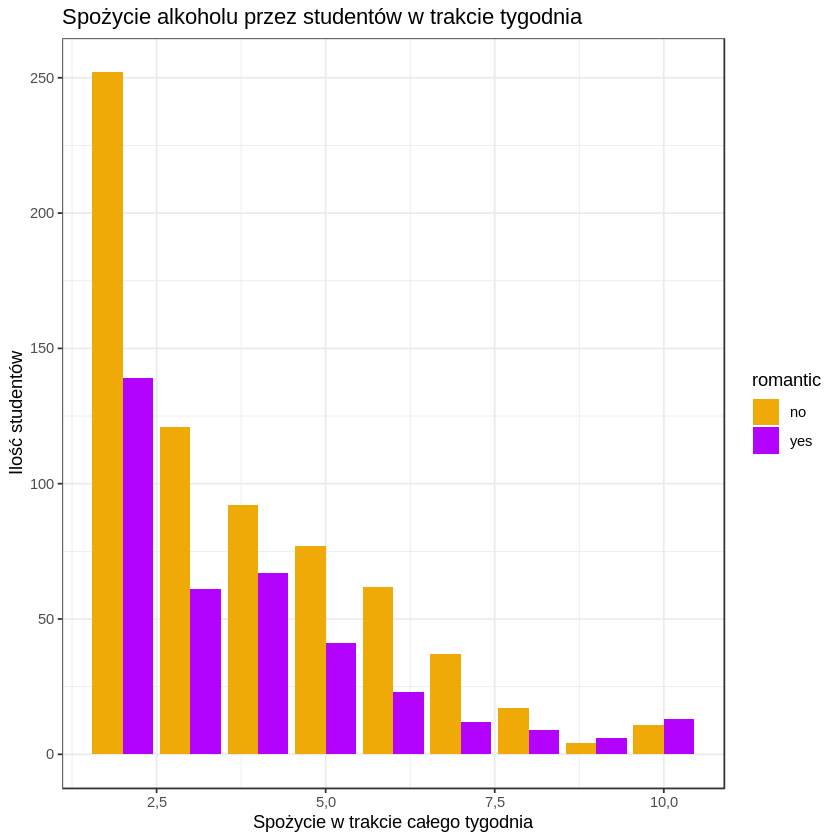

In [17]:
ggplot(df, aes(x = as.integer(Walc) + as.integer(Dalc), fill = romantic )) +
geom_bar(position = "dodge") + 
  scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) + 
    theme_bw() + xlab("Spożycie w trakcie całego tygodnia") +
    ylab("Ilość studentów") + 
    ggtitle("Spożycie alkoholu przez studentów w trakcie tygodnia")



Gdy popatrzymy na wykres procentowy, możemy jedynie utwierdzić się w przekonaniu, że osoby pijące najwięcej to osoby w związku.  

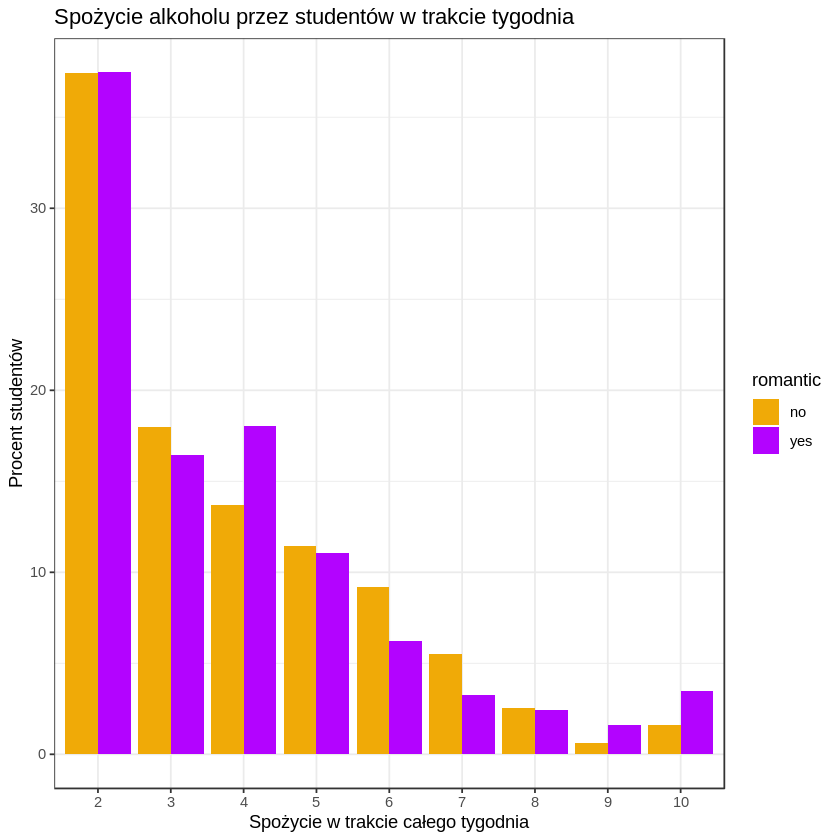

In [18]:
df2 <- df %>% 
  group_by(romantic) %>%
  transmute(alc = as.integer(Dalc) + as.integer(Walc))
x <- as.data.frame(prop.table(table(df2), 1)*100)

# procentowo
ggplot(x, aes(x = alc, y = Freq, fill = romantic)) +
geom_bar(position = "dodge", stat = "identity") + 
    scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
    theme_bw() + xlab("Spożycie w trakcie całego tygodnia") +
    ylab("Procent studentów") +
    ggtitle("Spożycie alkoholu przez studentów w trakcie tygodnia")

A jak to wygląda dla poszczególnych kierunków? Z tego wykresu możemy jedynie wyczytać, że matematyka jest mniej popularnym kierunkiem.     


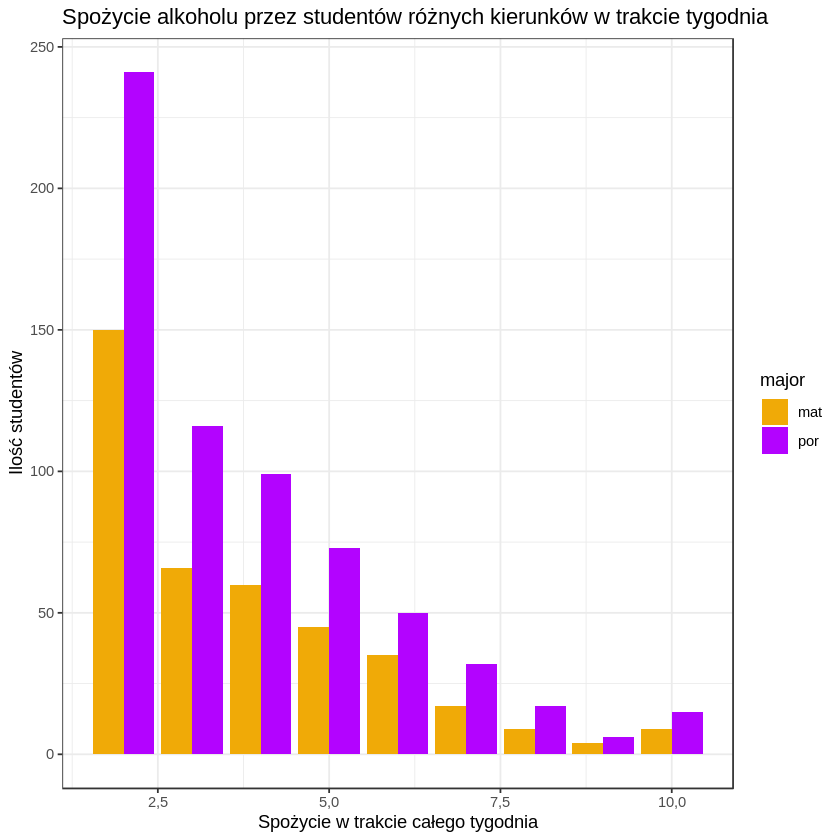

In [19]:
ggplot(df, aes(x = as.integer(Walc) + as.integer(Dalc), fill = major )) +
geom_bar(position = "dodge") +
    scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
    theme_bw() +
    xlab("Spożycie w trakcie całego tygodnia") + 
    ylab("Ilość studentów") +
    ggtitle("Spożycie alkoholu przez studentów różnych kierunków w trakcie tygodnia")

Gdy popatrzymy na odsetki dla poszczególnych kierunków, nie będziemy widzieć większych różnic.

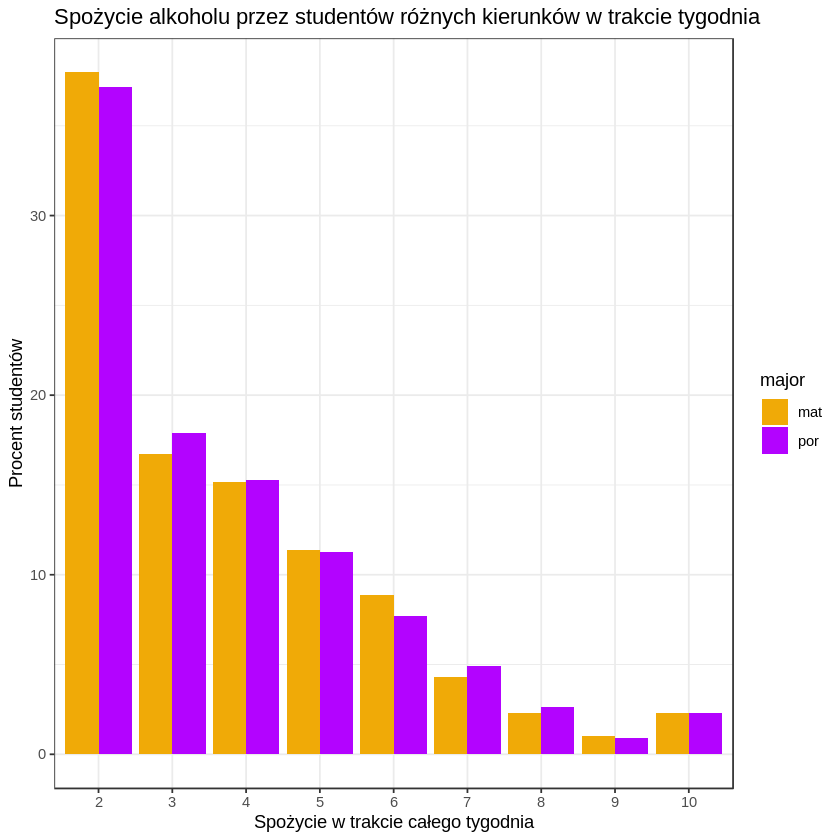

In [20]:
df2 <- df %>% 
  group_by(major) %>%
  transmute(alc = as.integer(Dalc) + as.integer(Walc))
x <- as.data.frame(prop.table(table(df2), 1)*100)

# procentowo
ggplot(x, aes(x = alc, y = Freq, fill = major)) +
geom_bar(position = "dodge", stat = "identity") + 
    scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
    theme_bw() + xlab("Spożycie w trakcie całego tygodnia") +
    ylab("Procent studentów") +
    ggtitle("Spożycie alkoholu przez studentów różnych kierunków w trakcie tygodnia")


Wróćmy do naszych romantyków. Spójrzmy na osoby w związku i ich nieobecności na różnych kierunkach.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



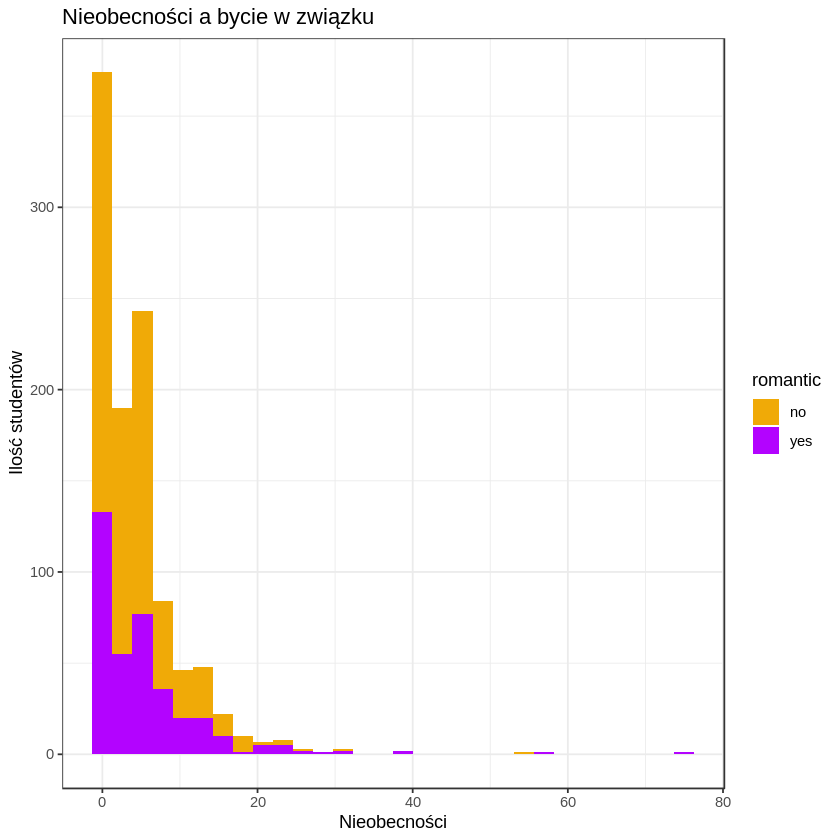

In [21]:
ggplot(df, aes(absences, fill = romantic)) +
    geom_histogram() +
    scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
    theme_bw() +
    xlab("Nieobecności") +
    ylab("Ilość studentów") +
    ggtitle("Nieobecności a bycie w związku")

Spójrzmy na "outliery", osoby mające więcej niż 20 nieobecności to prawie w większości osoby w związku. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



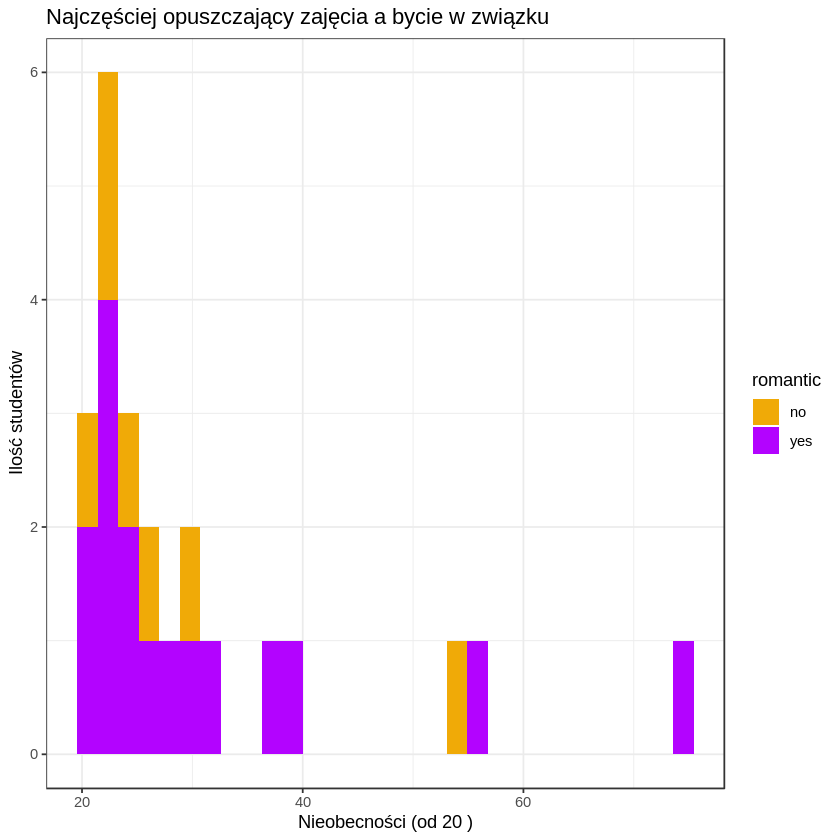

In [22]:
ggplot(df[df$absences >20, ], aes(absences, fill = romantic)) +
    geom_histogram()  +
    scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) + 
    theme_bw() +
    xlab("Nieobecności (od 20 )") + 
    ylab("Ilość studentów") +
    ggtitle("Najczęściej opuszczający zajęcia a bycie w związku")


to może mają więcej nieobecności

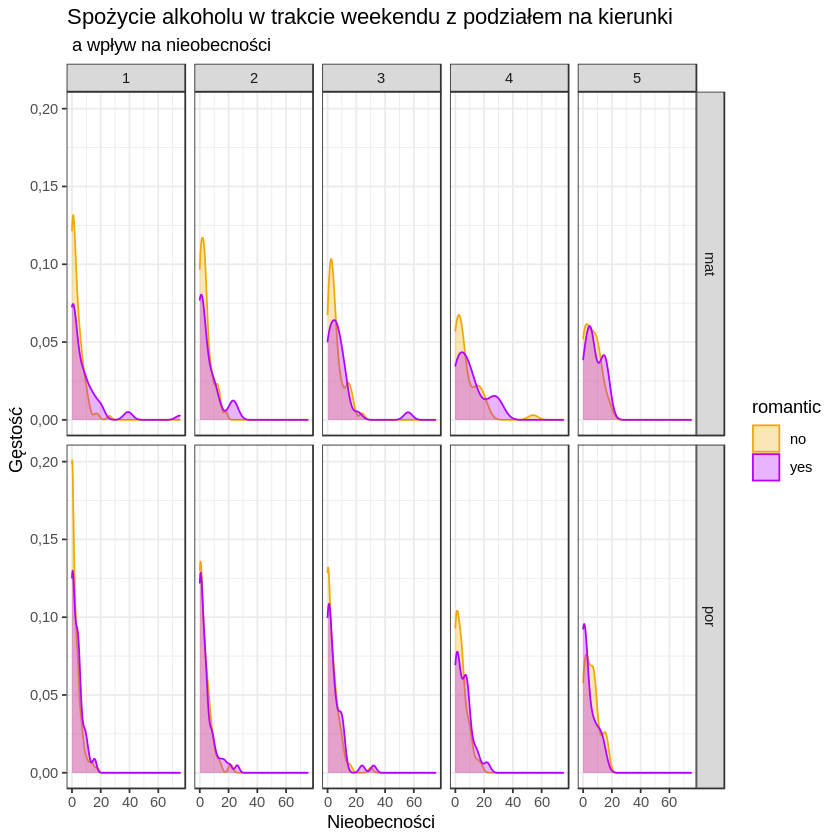

In [23]:

ggplot(df, aes(x = absences, color = romantic, fill = romantic)) +
geom_density(alpha = 0.3) +
facet_grid(major~Walc) + 
scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
theme_bw() +
xlab("Nieobecności") + 
ylab("Gęstość") + 
ggtitle("Spożycie alkoholu w trakcie weekendu z podziałem na kierunki" , subtitle =" a wpływ na nieobecności" ) +
scale_color_manual(values = c("#f0aa07", "#b303ff"  ))
# no i jakby ci bardziej pijani mieli więcej nieobecności
# ale czy to jesy wystarczająca próbka? Może jest tylko po 3 osoby pijące na lvl5?


Czy próbki są wystarczające? 

In [24]:
table(df[,c("major", "Walc")])

     Walc
major   1   2   3   4   5
  mat 151  85  80  51  28
  por 247 150 120  87  45


Podobny trend widzimy w konsumpcji aloholu w dni powszednie. Ale tutaj próbka osób jest za mała, żeby wysnuwać wnioski. 

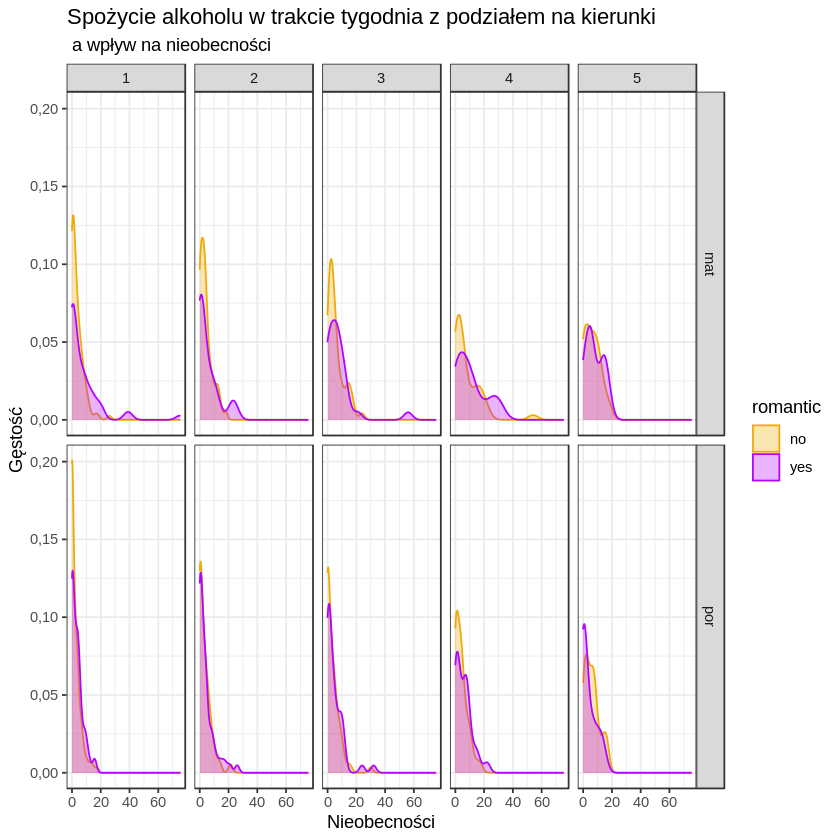

In [25]:
ggplot(df, aes(x = absences, fill = romantic, color = romantic)) + 
    geom_density(alpha = 0.3) +
    facet_grid(major~Dalc) +
    facet_grid(major~Walc) +
    scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
    theme_bw() +
    xlab("Nieobecności") + 
    ylab("Gęstość") +
    ggtitle("Spożycie alkoholu w trakcie tygodnia z podziałem na kierunki" , subtitle =" a wpływ na nieobecności" ) +
    scale_color_manual(values = c("#f0aa07", "#b303ff"  ))


In [26]:
table(df[,c("major", "Dalc")])

     Dalc
major   1   2   3   4   5
  mat 276  75  26   9   9
  por 451 121  43  17  17



Spójrzmy znowu na oceny. Miejsce zamieszkania też nie wydaje się mieć większego wpływu na oceny, nie ważne czy osoba jest w związku.

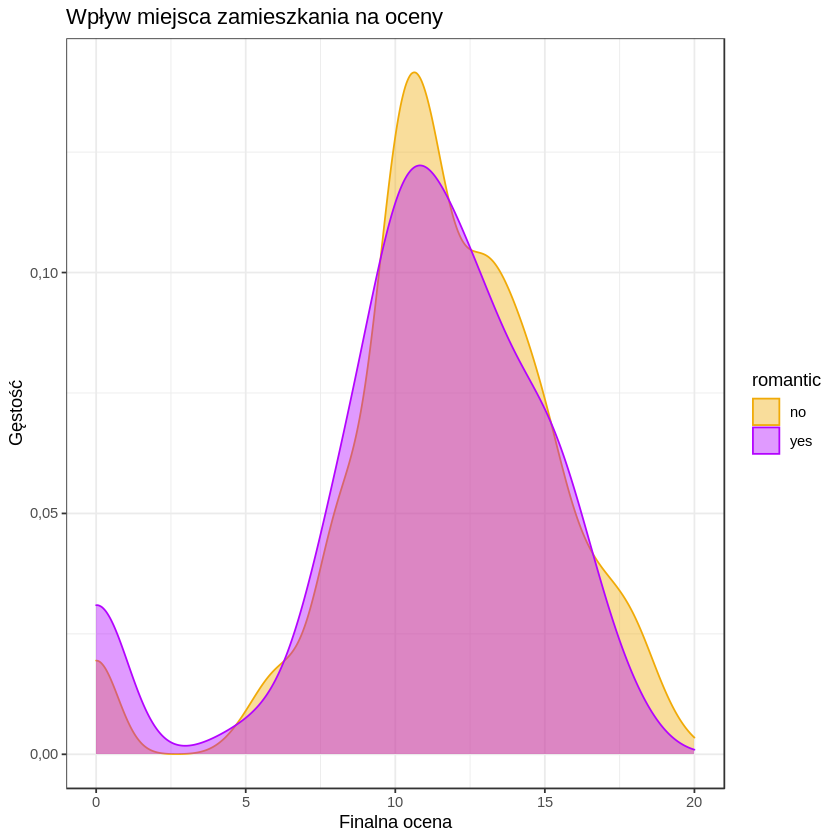

In [28]:
ggplot(df, aes(G3, color = romantic, fill = romantic)) + 
    geom_density(alpha= 0.4)  +
    scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) +
    theme_bw() +
    xlab("Finalna ocena") + 
    ylab("Gęstość") +
    ggtitle("Wpływ miejsca zamieszkania na oceny") +
    scale_color_manual(values = c("#f0aa07", "#b303ff"  ))


Czy picie ma jakiś związek na oceny? 

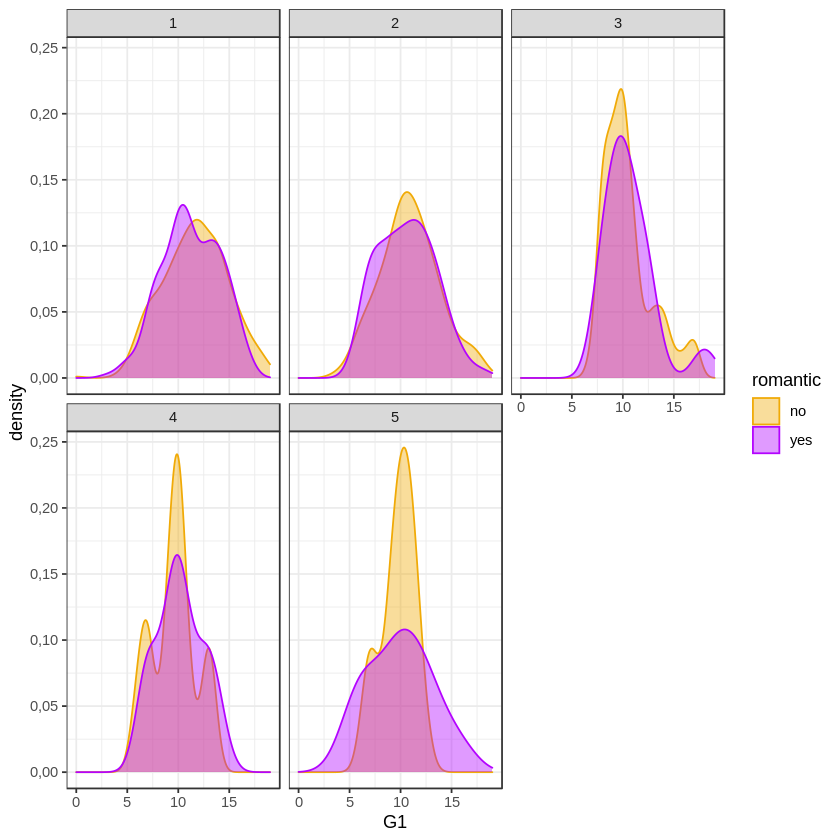

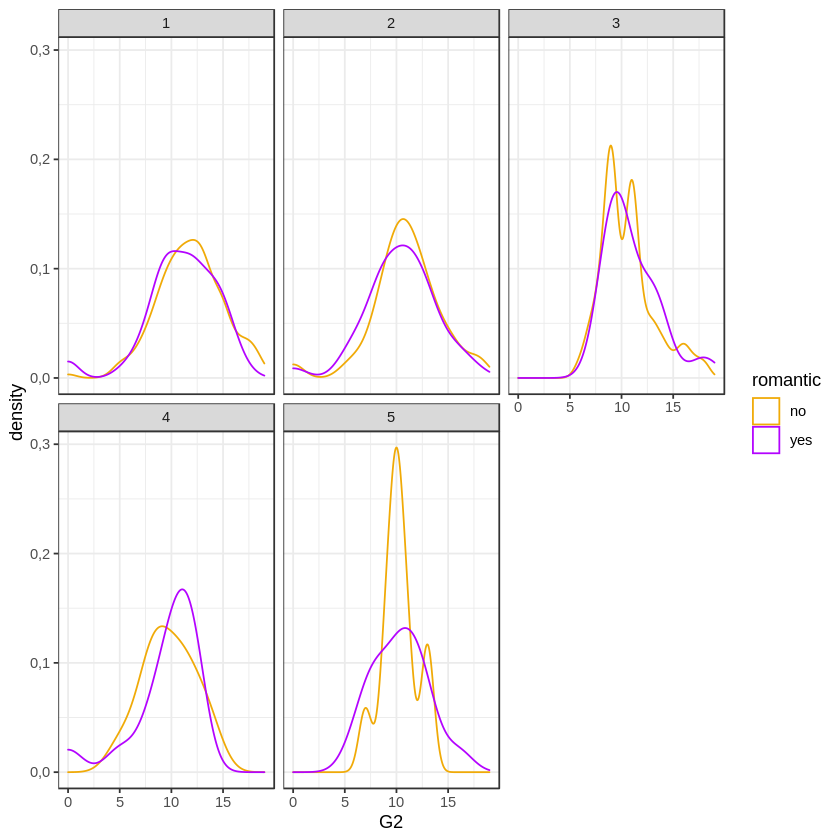

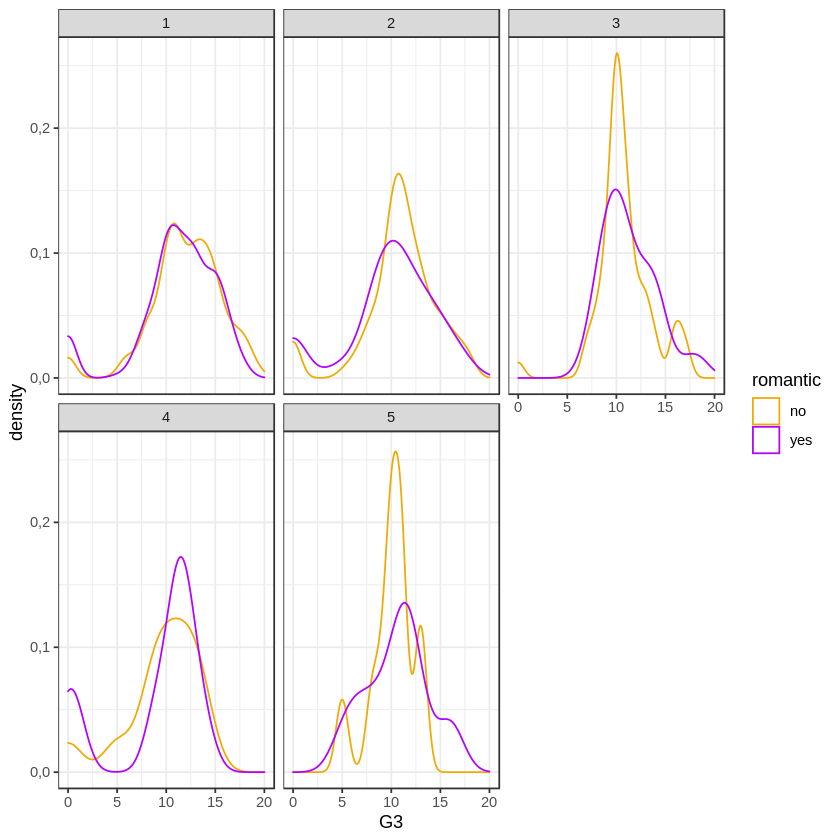

In [29]:
ggplot(df, aes(G1, color = romantic, fill = romantic)) + geom_density(alpha = 0.4) + facet_wrap(~Dalc) + scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) + theme_bw() + scale_color_manual(values = c("#f0aa07", "#b303ff"  ))
ggplot(df, aes(G2, color = romantic)) + geom_density(alpha = 0.4) + facet_wrap(~Dalc)  + scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) + theme_bw() + scale_color_manual(values = c("#f0aa07", "#b303ff"  ))
ggplot(df, aes(G3, color = romantic)) + geom_density(alpha = 0.4) + facet_wrap(~Dalc)  + scale_fill_manual(values = c("#f0aa07", "#b303ff"  )) + theme_bw() + scale_color_manual(values = c("#f0aa07", "#b303ff"  ))

In [30]:
table(df[, c("Dalc", "romantic")])

    romantic
Dalc  no yes
   1 471 256
   2 126  70
   3  53  16
   4  12  14
   5  11  15

Co ciekawe osoby w związku mają przy spadku liczby obecności nie doświadczają spadku ostatecznej oceny.

`geom_smooth()` using formula 'y ~ x'



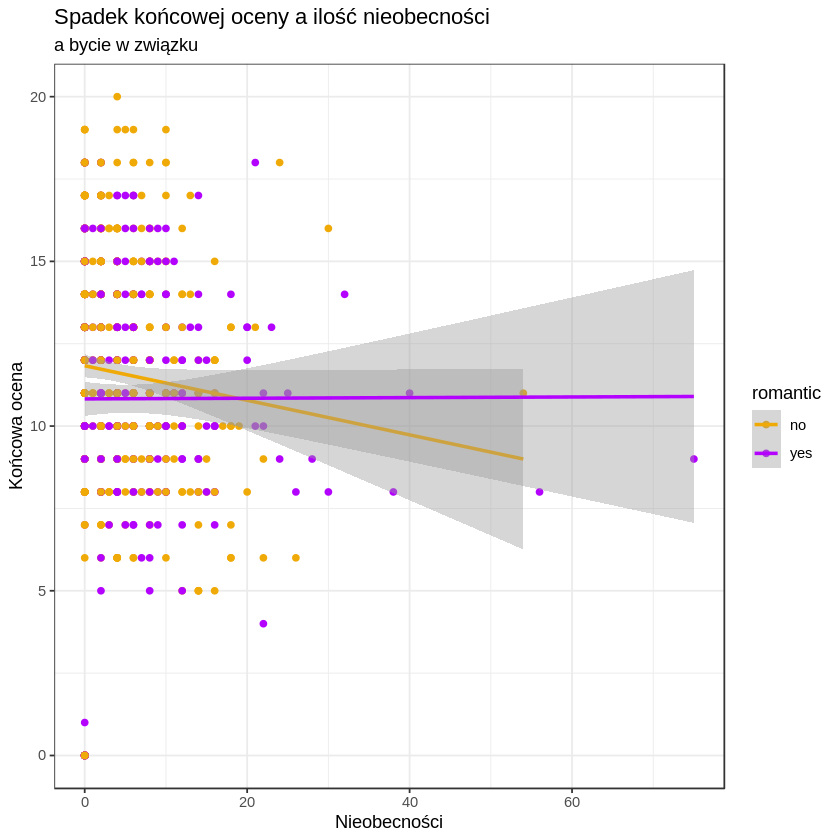

In [35]:
ggplot(df, aes(x = absences, y = G3, color = romantic)) + 
    geom_point() + 
    geom_smooth(method = "lm") + 
    theme_bw() + 
    scale_color_manual(values = c("#f0aa07", "#b303ff"  ))   +
    ggtitle("Spadek końcowej oceny a ilość nieobecności" , subtitle = "a bycie w związku") +
    xlab("Nieobecności") +
    ylab("Końcowa ocena")

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.io import arff
import xgboost as xgb

from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, recall_score, precision_score, plot_precision_recall_curve, mean_squared_error, r2_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
import category_encoders as ce
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.svm import SVC

from skopt import BayesSearchCV, plots

from google.auth.transport.requests import Request
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build

from time import sleep 

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

from watcher import entries_processed

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

np.random.seed(123)

#import credencials
from cred import key, email, password

# Data preprocessing

## Wczytanie danych

In [5]:
df = pd.read_csv("students-all.csv")
# remove rownames
df = df.iloc[:,1:]

In [6]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,major_por
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0


## Funkcja trenująca na xgboost
Warto zauważyć, że train_fast imituje crossvalidation czyli dzieli zbiór na części. Wobec tego należy być ostrożnym przy jej używaniu by nie podzielić na np. 70 - 30 train/test , potem train fast dzieli na 5 foldów, w wyniku czego model uczy się na 14% oryginalego zbioru.

In [7]:
def train_fast(df, max_depth, target ):
    
    """
    From Standard cross validation differs in data partitnion. Due to optimizing model on validation set,
    we get final AUC score from equally big test set.
    """
    
    # shuffling index
    df = df.sample(frac=1).reset_index(drop=True)
    n = len(df)
    
    # 5 fold cross validation
    kf = KFold(n_splits=5)
        
    
    ret = []
    tpr_arr = []
    fpr_arr = []
    
    # we will make test 10% and validation 10%
    for train_index, test_index in kf.split(df):
        
        train = df.iloc[train_index,:]
        
        v_ind = test_index[0:(len(test_index)//2)] 
        t_ind = test_index[(len(test_index)//2):len(test_index)]
        
        validation = df.iloc[v_ind,:]
        test = df.iloc[t_ind,:]
        
        label_train = train[target]
        label_val = validation[target]
        label_test = test[target]

        df_train = train.drop([target], axis = 1)
        df_test  = test.drop([target], axis = 1)
        df_val  = validation.drop([target], axis = 1)
        
        dtrain = xgb.DMatrix(data = df_train, label=label_train)
        dval = xgb.DMatrix(data = df_val, label=label_val)
        dtest = xgb.DMatrix(data = df_test, label=label_val)
        
        param = {'max_depth': max_depth, 'objective': 'binary:logistic', 'eval_metric':'auc'}
        
        evallist = [(dval, 'eval'), (dtrain, 'train')]
        
        num_round = 100
        
        bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=0)
        y_pred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

        fpr, tpr, thresholds = metrics.roc_curve(label_test.to_numpy(), y_pred)

        
        ret.append(metrics.auc(fpr, tpr))
        
        fpr_arr.append(fpr)
        tpr_arr.append(tpr)
        
    # fpr and tpr arrays are problematic, we will get them from median AUC score
    # note that we are returning mean auc score, so it is not ideal 
    index = np.where(np.mean(np.array(ret))== np.mean(np.array(ret)))[0][0]
    
    
    return np.array(ret).mean(), bst, fpr_arr[index],tpr_arr[index]

## Uśrednione auc

Jako że korzystamy z modelu drzewiastego, który korzysta z losowości, postanowiliśmy skonstruować średnią kroczącą, żeby trend był bardziej widoczny

In [8]:
def get_auc_mean(df, max_depth, target = "romantic_yes", n = 10):
    auc_sum = 0
    for i in range(n):
        auc, bst, _, _ = train_fast(df, max_depth, target)
        auc_sum += auc
    return auc_sum/n

Zobaczmy jak zachowuje się xgboost przy różnych parametrach max_depth. Może chwilę potrwać

In [9]:
%%capture
auc_results = []

for i in range(40): 
    auc = get_auc_mean(df_dummies, i, "romantic_yes")
    auc_results.append(auc)

In [10]:
# Zróbmy średnią kroczącą 
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [11]:
a = moving_average(np.array(auc_results),5)

Text(0.5, 1.0, 'auc based on max_depth')

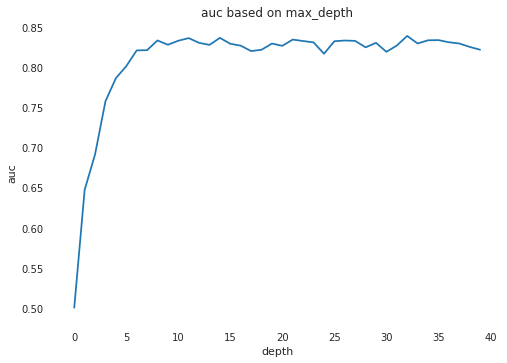

In [12]:
res = pd.DataFrame({"auc": auc_results, "depth": [i for i in range(40)]})
sns.lineplot(data = res, x = "depth", y = "auc").set_title("auc based on max_depth")

Text(0.5, 1.0, 'moving average of auc, base = 5')

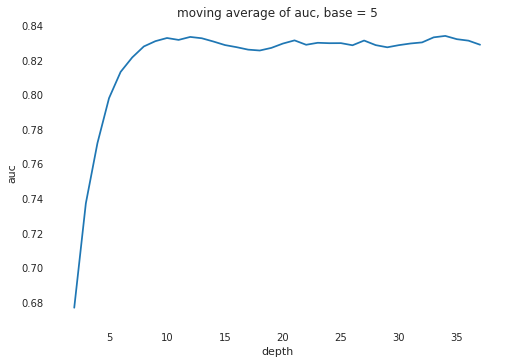

In [13]:
res = pd.DataFrame({"auc":a,"depth":np.arange(len(auc_results))[2:-2]})
sns.lineplot(data = res, x = "depth", y = "auc").set_title("moving average of auc, base = 5")

Jak widać od depth około 6 otrzymujemy średnio to samo AUC. 

## Różne encodery
Przetestujmy jak działają różne enkodery na naszym modelu - czy ktoreś będą bardzo polepszały auc? 
Będziemy korzystać z encoderów ze strony [scikit-learn](https://contrib.scikit-learn.org/categorical-encoding/). 

Naszą kolumnę przekonwertujemy na zera jeżeli osoba nie jest w związku i jedynki jeżeli są.

In [14]:
df['romantic'] = np.where(df['romantic']=='yes', 1, 0)
y = df[['romantic']].copy()
df = df.drop(columns='romantic')

In [15]:
encolums = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'major']

In [16]:
%%capture
res_dict = {}
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["BackwardDifferenceEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [17]:
%%capture
encoder = ce.binary.BinaryEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["BinaryEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [18]:
%%capture
encoder = ce.basen.BaseNEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["BaseNEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [19]:
%%capture
encoder = ce.hashing.HashingEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["HashingEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [20]:
%%capture
encoder = ce.helmert.HelmertEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["HelmertEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [21]:
%%capture
encoder = ce.one_hot.OneHotEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["OneHotEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [22]:
%%capture
encoder = ce.ordinal.OrdinalEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["OneHotEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [23]:
%%capture
encoder = ce.polynomial.PolynomialEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["OneHotEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

In [24]:
%%capture
encoder = ce.sum_coding.SumEncoder(cols = encolums)
df_encoded = encoder.fit_transform(df)
df_encoded['romantic'] = y
res_dict["OneHotEncoder"] = get_auc_mean(df_encoded, 18, "romantic")

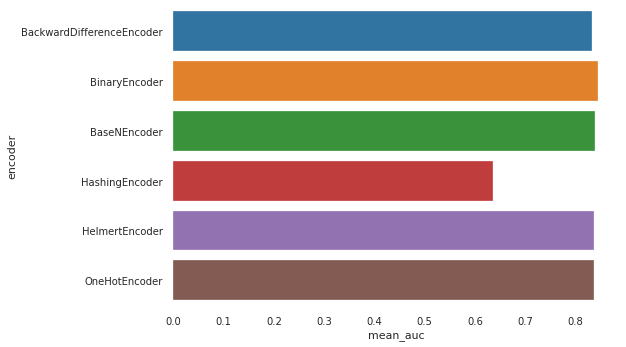

In [25]:
res_df = pd.DataFrame({"encoder": list(res_dict.keys()), "mean_auc": list(res_dict.values())})
sns.barplot(data = res_df, y = "encoder", x = "mean_auc")

Wszystkie encodery zwracają podobne wartości, oprócz `HashingEncoder`, którego wynik jest zdecydowanie mniejszy niż reszty.

In [26]:
from pprint import pprint
pprint(res_df)

                     encoder  mean_auc
0  BackwardDifferenceEncoder  0.833543
1              BinaryEncoder  0.845554
2               BaseNEncoder  0.838845
3             HashingEncoder  0.636498
4             HelmertEncoder  0.836377
5              OneHotEncoder  0.836121


Najlepszym według nas jest one_hot_encoder, który uzyskuje bardzo przyzwoity wynik, i jest intuicyjny w użyciu. W kolejnych obliczeniach używać będziemy jego i jego najbliższego kuzyna `dummies`

## Feature engineering

Zobaczmy czy zlogarytmowanie pewnych zmiennych - na przykład obecności, które nijak nie przypominają rozkłady normalnego da pozytywny skutek.

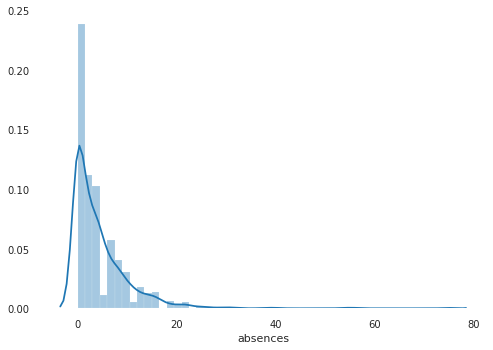

In [27]:
sns.distplot(df_dummies.absences)

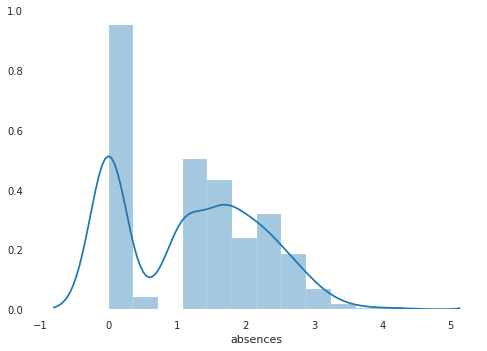

In [28]:
sns.distplot(np.log(df_dummies.absences+1)) 

Wykres jest bardziej rozciągnięty i ma krótsze "ogony"

In [29]:
df_dummies["absences"] = np.log(df.absences +1)

In [30]:
get_auc_mean(df_dummies, 19)

0.8236201757930403

Poniższe wykresy pokazują zmienne `Dalc` i `Walc` pomnożone przez siebie dla odpowiednio osób w związku i samotników. 

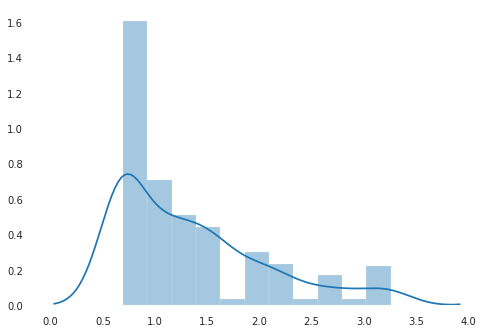

In [31]:
sns.distplot(np.log(df_dummies.loc[df_dummies.romantic_yes == 1].Walc * df_dummies.loc[df_dummies.romantic_yes == 1].Dalc + 1))

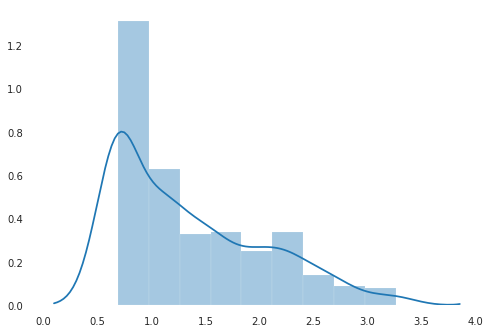

In [32]:
sns.distplot(np.log(df_dummies.loc[df_dummies.romantic_yes == 0].Walc * df_dummies.loc[df_dummies.romantic_yes == 0].Dalc +1))

Wykresy zmiennych trochę się różnią. 

Spróbujmy stworzyć nowe zmienne i zobaczmy czy da to lepszy wynik
 * WeekandEnd
 * WeirdDrinker

In [33]:
df_dummies["WeekandEnd"] = np.log(df_dummies.Walc * df_dummies.Dalc +1)

In [34]:
get_auc_mean(df_dummies, 19)  # idziemy do przodu

0.8275404807784629

In [35]:
a = np.where((df_dummies.Dalc > 3)&(df_dummies.Walc <3),1,0 )   # wniosek z eda, osoby oznaczone w tej kolumnie jako 1, to wyłącznie romantycy
df_dummies["WeirdDrinker"] = a

In [36]:
get_auc_mean(df_dummies,19)      # porównywalnie z ostatnią

0.8236886419768071

Wynik prównywalny z ostatnim

## PCA
Korzystając z Principal Component Analisis zobaczymy, czy jest wizualna różnica dla 2 pierwszych komponentów w stosunku do `romantic`.

In [37]:
pca = PCA(n_components=10) 
X = preprocessing.normalize(df_dummies.drop("romantic_yes", axis = 1), norm='l2')

principalComponents = pca.fit_transform(X)

cols = []
for i in range(10): 
    cols.append("pc"+str(i+1))

principalDf = pd.DataFrame(data = principalComponents, columns = cols)
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.291357,-0.002310,-0.068397,-0.104919,0.132940,-0.017787,-0.000859,-0.005117,0.019692,0.029364
1,0.293148,-0.014608,-0.150127,-0.030610,0.003750,-0.047458,0.017834,0.000423,0.035776,-0.037097
2,0.065921,-0.117237,-0.074609,0.000286,-0.021265,0.022723,0.022138,-0.010900,-0.018566,-0.054670
3,-0.190891,0.069406,0.031124,-0.042401,-0.026170,0.030764,0.026880,-0.022322,0.008727,0.018381
4,0.058324,-0.061050,-0.065479,-0.137130,0.010415,0.032583,-0.062040,-0.007676,0.000336,-0.006266
...,...,...,...,...,...,...,...,...,...,...
1039,0.076266,0.019750,-0.048860,-0.049729,-0.027928,0.011573,-0.026541,-0.009373,-0.017060,-0.026426
1040,-0.157430,0.026529,-0.045728,0.067681,0.041066,-0.023296,0.014745,-0.011721,0.005191,0.007356
1041,0.012407,0.073764,-0.076956,0.019303,-0.081741,0.139707,-0.014794,-0.072000,-0.014485,0.044567
1042,0.055787,-0.105886,0.039204,0.093806,0.034677,0.004991,0.009567,-0.022203,-0.032627,0.034219


In [38]:
pca.explained_variance_ratio_.cumsum()   # 55 % wariancji w 2 ważnych kolumnach

array([0.48064371, 0.55648099, 0.61878967, 0.66826408, 0.71678488,
       0.75103801, 0.78087927, 0.80322883, 0.82247856, 0.84129384])

zredukowaliśmy wymiar do 10

In [39]:
pca_df = pd.concat([principalDf,df_dummies.romantic_yes],axis =1)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,romantic_yes
0,0.291357,-0.002310,-0.068397,-0.104919,0.132940,-0.017787,-0.000859,-0.005117,0.019692,0.029364,0
1,0.293148,-0.014608,-0.150127,-0.030610,0.003750,-0.047458,0.017834,0.000423,0.035776,-0.037097,0
2,0.065921,-0.117237,-0.074609,0.000286,-0.021265,0.022723,0.022138,-0.010900,-0.018566,-0.054670,0
3,-0.190891,0.069406,0.031124,-0.042401,-0.026170,0.030764,0.026880,-0.022322,0.008727,0.018381,1
4,0.058324,-0.061050,-0.065479,-0.137130,0.010415,0.032583,-0.062040,-0.007676,0.000336,-0.006266,0
...,...,...,...,...,...,...,...,...,...,...,...
1039,0.076266,0.019750,-0.048860,-0.049729,-0.027928,0.011573,-0.026541,-0.009373,-0.017060,-0.026426,0
1040,-0.157430,0.026529,-0.045728,0.067681,0.041066,-0.023296,0.014745,-0.011721,0.005191,0.007356,0
1041,0.012407,0.073764,-0.076956,0.019303,-0.081741,0.139707,-0.014794,-0.072000,-0.014485,0.044567,0
1042,0.055787,-0.105886,0.039204,0.093806,0.034677,0.004991,0.009567,-0.022203,-0.032627,0.034219,0


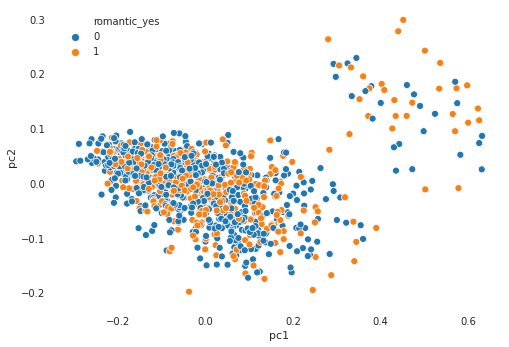

In [40]:
sns.scatterplot(x = "pc1", y = "pc2", data = pca_df, hue = "romantic_yes")  

Nie widać widocznego podziału danych

In [41]:
get_auc_mean(pca_df, 19)

0.6304147943433231

Wynik po zastosowaniu PCA jest gorszy niż poprzednie wyniki.

Czyli najlepsze średnie AUC dostaliśmy po przekształceniach
ramki danych logarytmicznie i eksponując niektóre zależności

Ponowne wczytanie danych

In [42]:
df = pd.read_csv("students-all.csv")
# remove rownames
df = df.iloc[:,1:]
df['romantic'] = np.where(df['romantic']=='yes', 1, 0)
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,major_por
0,18,4,4,2,2,0,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,0,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,1,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,0
4,16,3,3,1,2,0,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [43]:
df_dummies = df_dummies.sample(frac =1)

Po zastanowieniu doszliśmy do wniosku, że chcielibyśmy zobaczyć jak różne enkodery działają na różnych modelach, by móc zdecydować się na ostateczny wybór modelu, który chcemy zastosować.

In [44]:
def measure_encoder(encoder, model):
    """
    Funkcja działająca jako pipeline w następujących krokach:
    * kodowanie
    * dopasowanie
    * liczenie roc_auc_score
    """
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['romantic'], axis = 1),df.romantic, test_size = 0.3, random_state = 66)
    
    encoder.fit(X_train, y_train)
    
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    auc = roc_auc_score(y_test, y_pred)
    
    return auc

In [45]:
columns= ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'major']

Wszystkie możliwe encodery

In [46]:
enc = [ce.BackwardDifferenceEncoder(cols=columns),
ce.BaseNEncoder(cols=columns),
ce.BinaryEncoder(cols=columns),
ce.CatBoostEncoder(cols=columns),
ce.HashingEncoder(cols=columns),
ce.HelmertEncoder(cols=columns),
ce.JamesSteinEncoder(cols=columns),
ce.LeaveOneOutEncoder(cols=columns),
ce.MEstimateEncoder(cols=columns),
ce.OneHotEncoder(cols=columns),
ce.OrdinalEncoder(cols=columns),
ce.SumEncoder(cols=columns),
ce.PolynomialEncoder(cols=columns),
ce.TargetEncoder(cols=columns),
ce.WOEEncoder(cols=columns)]

In [47]:
def measure_encodesrs(model):
    res = pd.DataFrame()
    names = ['BackwardDifferenceEncoder',
            'BaseNEncoder',
            'BinaryEncoder',
            'CatBoostEncoder',
             'HashingEncoder',
             'HelmertEncoder',
             'JamesSteinEncoder',
             'LeaveOneOutEncoder',
             'MEstimateEncoder',
             'OneHotEncoder',
             'OrdinalEncoder',
             'SumEncoder',
             'PolynomialEncoder',
             'TargetEncoder',
             'WOEEncoder'
            ]
    for i in range(len(enc)):
        auc = measure_encoder(enc[i], model)
        res = res.append({"Name": names[i], "auc": auc}, ignore_index = True)
    return res

Modele, które rozważamy do klasyfikacji 

In [48]:
models = [AdaBoostClassifier(), 
          BaggingClassifier(), 
          ExtraTreesClassifier(),
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          XGBClassifier(),
          XGBRFClassifier()]

In [49]:
r = []
for m in models:
    print(m)
    print(measure_encodesrs(m))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
                         Name       auc
0   BackwardDifferenceEncoder  0.547339
1                BaseNEncoder  0.554279
2               BinaryEncoder  0.554279
3             CatBoostEncoder  0.612314
4              HashingEncoder  0.508089
5              HelmertEncoder  0.589993
6           JamesSteinEncoder  0.612314
7          LeaveOneOutEncoder  0.612314
8            MEstimateEncoder  0.612314
9               OneHotEncoder  0.588004
10             OrdinalEncoder  0.547339
11                 SumEncoder  0.588004
12          PolynomialEncoder  0.560732
13              TargetEncoder  0.612314
14                 WOEEncoder  0.612314
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose

Warto rozważyć i dostroić hiperparametry dla dwóch modeli z potencjałem - XGBClassifier i ExtraTreesClassifier.
Poniżej zastosowaliśmy BayesSearchCV by dostroić parametry dla tych modeli.

In [50]:
def on_step(optim_result):
    score = bsc.best_score_
    print("best score: %s" % score)
    return

In [51]:
encoder = ce.OneHotEncoder()

X = pd.read_csv("students-all.csv").iloc[:,1:]
y = X.romantic
X = X.drop("romantic", axis =1)

encoder.fit(X)
X = encoder.transform(X)

In [52]:
xgb_model = xgb.XGBClassifier()
extra_trees_model = ExtraTreesClassifier()

xgb_params = {
                "max_depth"         : np.arange(3,100),
                "learning_rate"     : np.arange(0.001,1,0.001, dtype = "float64"),
                "booster"           : ["gbtree","gblinear","dart"],
                "subsample"         : np.arange(0.1,1,0.1, dtype = "float64"),
                "colsample_bytree"  : np.arange(0.1,1,0.1, dtype = "float64"),
                "reg_alpha"         : np.arange(0,10,0.1, dtype = "float64"),
                "reg_lambda"        : np.arange(0,10,0.1, dtype = "float64")
}

extra_params = {
                    "min_samples_split" : np.arange(2,20,1),
                    "min_samples_leaf"  : np.arange(1,20,1),
                    "bootstrap" : [False,True],
                    "ccp_alpha" :  np.arange(0,10, 0.1)
                }




In [19]:
bsc = BayesSearchCV(extra_trees_model, extra_params, n_iter = 100, cv = 5)
bsc.fit(X,y, callback = on_step)


best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best sco

BayesSearchCV(cv=5, error_score='raise',
              estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                             class_weight=None,
                                             criterion='gini', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=N...
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.

In [8]:
bsc = BayesSearchCV(xgb_model, xgb_params, n_iter = 200, cv = 5)
bsc.fit(X,y, callback = on_step)


best score: 0.6283524904214559
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6772030651340997
best score: 0.6772030651340997
best score: 0.6772030651340997
best score: 0.6772030651340997
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best sco

BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_...
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 

In [9]:
bsc.best_params_

OrderedDict([('booster', 'dart'),
             ('colsample_bytree', 0.9),
             ('learning_rate', 0.461),
             ('max_depth', 47),
             ('reg_alpha', 0.0),
             ('reg_lambda', 1.1),
             ('subsample', 0.6)])

Model ten zapisaliśmy jako alco.model, żeby móc go potem bezproblemowo używać

In [53]:
xgb_model = xgb.XGBClassifier()
xgb_model.load_model('alco.model')

# Wyniki ostatecznego modelu

Wczytanie po raz kolejny danych, by na pewno były czyste i ich zenkodowanie.

In [54]:
df = pd.read_csv("students-all.csv")
# remove rownames
df = df.iloc[:,1:]

encoder = ce.OneHotEncoder()

df = pd.read_csv("students-all.csv").iloc[:,1:]
y = df.romantic
df = df.drop("romantic", axis =1)

df_one_hot = encoder.fit_transform(df)

target = np.where(y=='yes', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(df_one_hot,
                                                    target, test_size = 0.2, random_state = 666)

Zobaczmy ile wynosi auc:

In [55]:
y_predict_prob = xgb_model.predict_proba(X_test)[:,1]
y_pres = xgb_model.predict(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict_prob)

0.8041666666666667

## Features importance

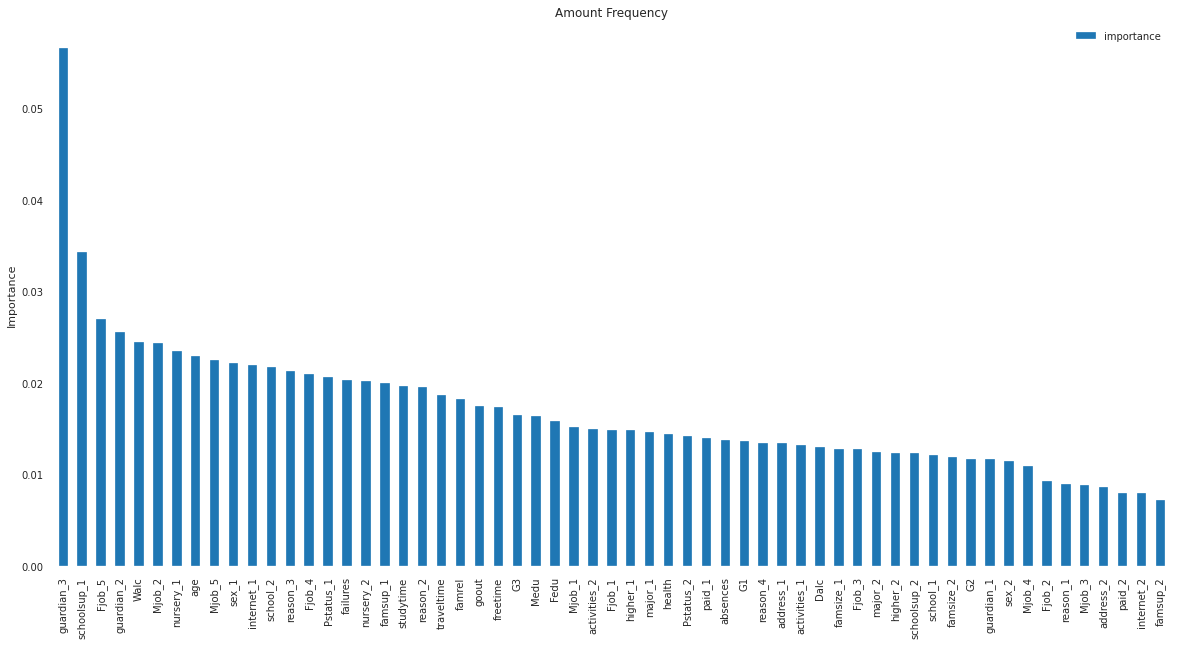

In [56]:
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
names = []
val = []
for index in sorted_idx:
    names.append(X_train.columns[index])
    val.append(xgb_model.feature_importances_[index])

d = pd.DataFrame({'feature':names, 'importance': val});
plt.rcParams['figure.figsize'] = [20, 10];
ax = d.plot(kind='bar', label = names);
ax.set_title('Amount Frequency');
ax.set_xlabel('');
ax.set_ylabel('Importance');
ax.set_xticklabels(names);

### Confusion matrix

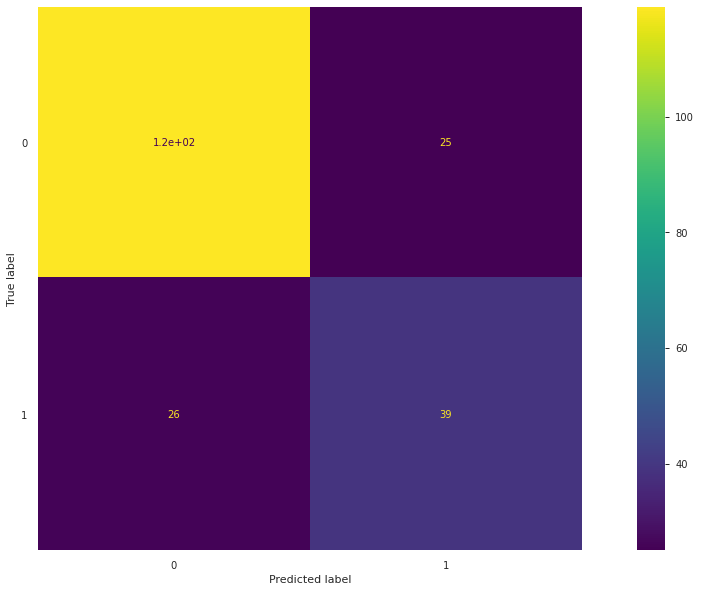

In [57]:
plot_confusion_matrix(xgb_model, X_test, y_test)

### Roc curve

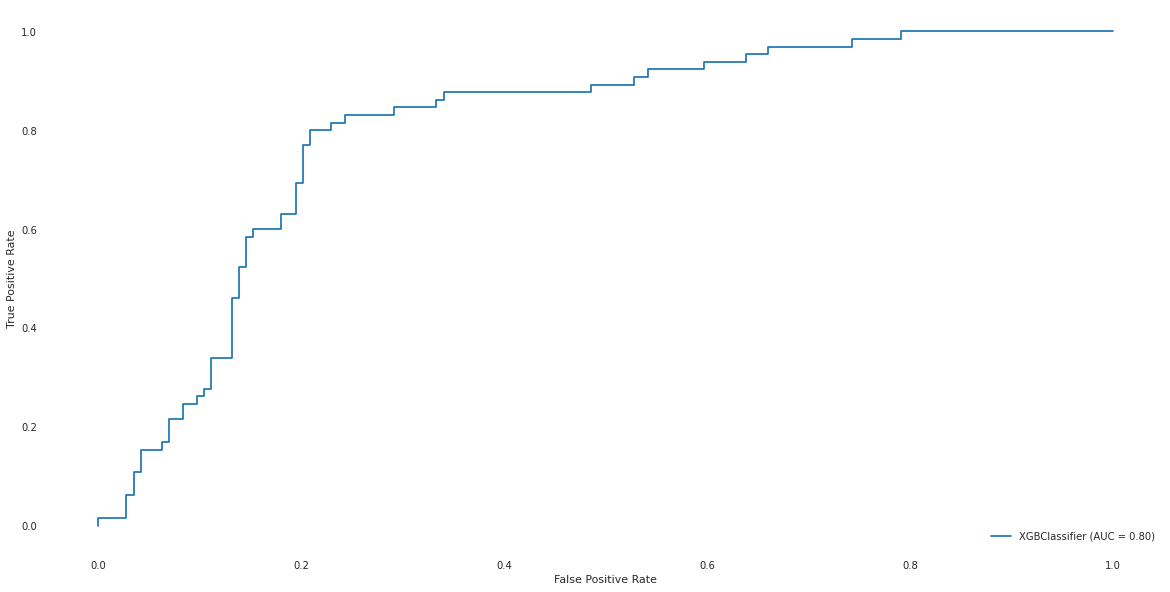

In [58]:
plot_roc_curve(xgb_model, X_test, y_test)

### Precision Recall curve

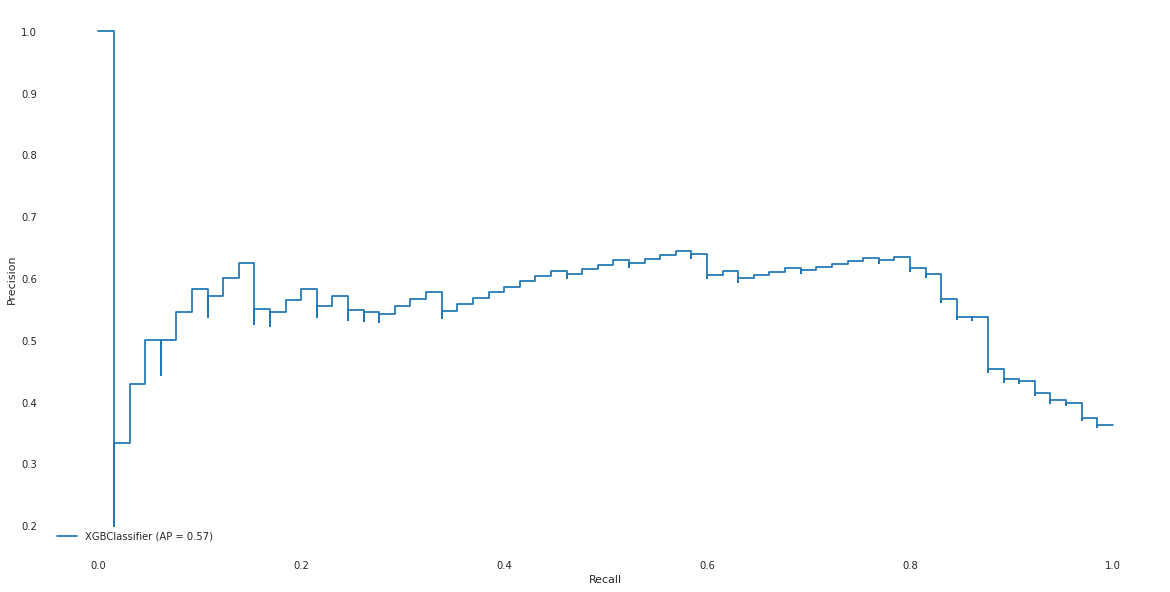

In [59]:
plot_precision_recall_curve(xgb_model, X_test, y_test)

## Wykrzystanie modelu - Ankieta w czasie rzeczywistym
Poniższy kod przedstawia budowę skryptu, który w czasie rzeczywistym przetwarza akietę (link)[https://docs.google.com/forms/d/e/1FAIpQLSdf2byFFOKvdps4FAR6ZQZbDuFN24LqqXO13Z_eZTYgxQKIdA/viewform]

Używa on klucza deweloperskiego, którego ze względów bezpieczeństwa i prywatności nie udostępnimy, niemniej jednak kod upubliczniamy ze wzgęldu na jego użyteczność.

In [60]:
def parse(data, encoder):
    """
    Parsing data to the same format as in "students-all.csv"
    
    returns: nicks, mails array and dataframe
    """
    nicks = np.array(data['Nick'])
    mails = np.array(data['Feedback mail'])
    data = data.iloc[:, 2:-1]

    column_names = [
        'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
        'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet',
        'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
        'G1', 'G2', 'G3'
    ]

    data.columns = column_names

    # deafults
    data['school'] = np.repeat("GP", data.shape[0])
    data['major'] = np.repeat("mat", data.shape[0])
    data['higher'] = np.repeat("yes", data.shape[0])

    # corect order
    data = data[[
        'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
        'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
        'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
        'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'major'
    ]]
    
    data['age'] = pd.to_numeric(data['age'])
    data['sex'] = np.where(data.sex == 'Male', 'M', 'F')
    data['address'] = np.where(data.address == 'Rural', 'R', 'U')
    data['famsize'] = np.where(data.famsize == 'more than 3', 'GT3', 'LE3')
    data['Pstatus'] = np.where(data.Pstatus == 'living apart', 'A', 'T')

    d1 = {
        'none': 0,
        'primary education': 1,
        'middle school': 2,
        'high school': 3,
        'higher education': 4
    }

    data['Medu'] = [d1[item] for item in list(data.Medu)]
    data['Fedu'] = [d1[item] for item in list(data.Fedu)]

    d2 = {
        'teacher': 'teacher',
        'healthcare': 'health',
        'civil services': 'civil',
        'home': 'at_home',
        'other': 'other'
    }

    data['Mjob'] = [d2[item] for item in list(data.Mjob)]
    data['Fjob'] = [d2[item] for item in list(data.Fjob)]

    d3 = {
        'close to home': 'home',
        'school reputation': 'reputation',
        'course preference': 'course',
        'other': 'other'
    }

    data['reason'] = [d3[item] for item in list(data.reason)]
    
    d4 = {'Mother':'mother', 'Father':'father', 'other':'other'}
    
    data['guardian'] = [d4[item] for item in list(data.guardian)]

    d5 = {'< 15':1, '15-30':2, '30-60':3,'60 >':4}
    
    data['traveltime'] = [d5[item] for item in list(data.traveltime)]
    
    d6 = {'< 2':1, '2-5':2, '5-10':3,'10 >':4}
    
    data['studytime'] = [d6[item] for item in list(data.studytime)]
    
    data['G1'] = np.array(((pd.to_numeric(data.G1) -2 )/3)*20 , dtype = 'int64')
    data['G2'] = np.array(((pd.to_numeric(data.G2) -2 )/3)*20 , dtype = 'int64') 
    data['G3'] = np.array(((pd.to_numeric(data.G3) -2 )/3)*20 , dtype = 'int64')
    
    data['absences'] = np.array(pd.to_numeric(data.absences) , dtype = 'int64')
    data['failures'] = np.array(data.failures, dtype = 'int64')
    data['famrel']   = np.array(data.famrel, dtype = 'int64')
    data['freetime'] = np.array(data.freetime, dtype = 'int64')
    data['goout']    = np.array(data.goout, dtype = 'int64')
    data['Dalc']     = np.array(data.Dalc, dtype = 'int64')
    data['Walc']     = np.array(data.Walc, dtype = 'int64')
    data['health']   = np.array(data.health, dtype = 'int64')
    
    
    data_transformed = encoder.transform(data)
    
    return nicks, mails, data_transformed

In [61]:
def get_new_entries(entries_processed,
                    encoder,
                    rows = 5000, 
                    SAMPLE_SPREADSHEET_ID = '1e1tWLI0vD05bUj-wLWicOnl0iU-GWz0aaWEtRDlTQ2M'):
    """
    Ściąga i przetwarza nowe wiersze w arkuszu odpowiedzi od wiersza = entries_processed
    """
    
    cols = "AG"
    SAMPLE_RANGE_NAME = 'A1:'+ cols + str(rows)
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])
    data = pd.DataFrame(values)
    data.columns = data.iloc[0,:]
    data = data.iloc[1+entries_processed:,:]
    print('Processing from rows: {}. Got {} new entries'.format(entries_processed, data.shape[0]))
    
    n,m,df = parse(data, encoder)
    return n,m,df

In [62]:
def predict_new_entries(df, model):
    """
    Przewiduje ramkę danych przed model - wrapper
    """
    
    y_predict = model.predict(df)
    y_predict_prob = model.predict_proba(df)[:,1]
    
    return y_predict, y_predict_prob

In [63]:
def send_response(nick, send_to_email, result, prob):
    """
    wysyła mail do adresata
    """
    
    # dane prywatne 
    global email, password
    subject = "Student, do you have partner?"
    message = 'Hi, {}'.format(nick)
    message += "\n\nThank you for participating in our survey! Here are your results: "

    if result == 0:
        message += '\nForever alone'
    else:
        message += '\nYou have partner!'
    
    message += '\nYour probability of being in romantic relationship is: {}'.format(prob)
    message += '\n\nThis result was predicted by machine learning model trained on Student Alcohol Consumption dataset from University Of Camerino'
    
    message += '\n\nSee you next time!'
    
    msg = MIMEMultipart()
    msg["From"] = email
    msg["To"] = send_to_email
    msg["Subject"] = subject

    msg.attach(MIMEText(message, 'plain'))

    try: 
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(email, password)
        text = msg.as_string()
        server.sendmail(email, send_to_email, text)
        server.quit()
        censored_mail = send_to_email[:2] + '*'*(len(send_to_email)-2)
        print('Sent mail to {}, {}'.format(nick, censored_mail))
    
    except:
        print('Error in sending')
    return

In [64]:
def notify_users(n,m,y_predict, y_predict_prob, sleep_time = 0.5):
    """
    wysyła wiele maili
    """
    for i in range(len(n)):
        if m[i]:
            send_response(n[i], m[i], y_predict[i], y_predict_prob[i])
            sleep(sleep_time)
    return

In [65]:
def update(model, encoder, small_sleep_time):
    """
    pipeline
    """
    
    f = open("./watcher.py", "r")
    entries_processed = int(f.read()[18:])
    f.close()
    
    n,m,df = get_new_entries(entries_processed, encoder)
    
    if len(n) == 0: return
    
    y_predict, y_predict_prob = predict_new_entries(df, model)
    notify_users(n,m,y_predict, y_predict_prob)
    
    f = open("./watcher.py", "w")
    f.write("entries_processed={}".format(entries_processed + len(n)))
    f.close()
    
    return

In [66]:
def inf_update(model,
               encoder, 
               big_sleep_time=60, 
               small_sleep_time=0.5):
    """
    infinite pipeline
    """
    
    while True:
        update(model, encoder, small_sleep_time)
        sleep(big_sleep_time)

In [67]:
service = build('sheets', 'v4',developerKey=key)
sheet = service.spreadsheets()
#SAMPLE_SPREADSHEET_ID = '1e1tWLI0vD05bUj-wLWicOnl0iU-GWz0aaWEtRDlTQ2M'

In [ ]:
inf_update(xgb_model,encoder, big_sleep_time=60)

Zobaczmy wyniki ankiery

In [68]:
n,m,df = get_new_entries(0, encoder)

y_predict, y_predict_prob = predict_new_entries(df, xgb_model)
pd.DataFrame({'nick':n, 'romantic':y_predict,'prob':y_predict_prob})

Processing from rows: 0. Got 28 new entries


,nick,romantic,prob
0,testuś,1,0.612720
1,testuś2,1,0.631785
2,test3,0,0.195529
3,test4,0,0.172275
4,test_czy_submit_dziala,1,0.520502
5,3,0,0.380111
6,silnoręki,1,0.789935
7,Haha,1,0.606270
8,Beniz,0,0.131113
9,h_1,0,0.275652


# Podsumowanie
Pomimo tego, iż wyternowaliśmy zbiór na innym targecie niż był on zamierzony, udało się nam dostać całkiem niezły wynik i stworzyć interesującą ankietę, która (mamy nadzieję) dała odrobinę radości w tych kwarantannowych czasach. 

# Oświadczenie
"Potwierdzam samodzielność powyższej pracy oraz niekorzystanie przeze mnie z niedozwolonych źródeł"